<a href="https://colab.research.google.com/github/kengsengwang/Machine-Learning-for-Identifying-Fraudulent-Calls/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning for Identifying Fraudent Calls

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

## Initial Data Inspection


In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (update the path if needed)
# Correct the file path to point to the intended data file location
# Based on subsequent cells, './data/cleaned_calls.csv' seems more appropriate
file_path = './data/cleaned_calls.csv'

# Add a try-except block to handle the FileNotFoundError gracefully
try:
    df = pd.read_csv(file_path)
    print("Data Frame Created Successfully")
    print("\nFirst 5 Rows of the Data Frame:")
    print(df.head())

    # 2. Memory Usage and Data Types
    print("\nMemory Usage and Data Types:")
    memory_usage = df.memory_usage(deep=True).sum() / (1024**2)  # Convert bytes to MB
    print(f"Total Memory Usage: {memory_usage:.2f} MB")
    print("\nData Types:")
    print(df.dtypes)

    # 3. Data Structure Overview
    print("\nData Structure Overview:")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")
    print("\nSummary Statistics (Numerical Columns):")
    print(df.describe())
    print("\nSummary Statistics (All Columns):")
    print(df.describe(include='all'))

    # Checking for unique values and data distribution
    print("\nUnique Values Per Column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

    print("\nChecking for Null Values:")
    print(df.isnull().sum())

    print("\nSample Rows for Quick Inspection:")
    print(df.sample(5))

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nTotal Duplicate Rows: {duplicates}")

    # Display column names for reference
    print("\nColumn Names:")
    print(df.columns.tolist())

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please ensure the file 'cleaned_calls.csv' exists in the 'data' directory relative to your notebook.")
    # You might want to exit or handle this error differently depending on your workflow
    # For now, we just print an error message and continue (df will not be defined)

Data Frame Created Successfully

First 5 Rows of the Data Frame:
       ID  Call Duration  Call Frequency  Financial Loss Flagged by Carrier  \
0  947429           -719              12       42.130000         Suspicious   
1  540498            116               3       29.900000           Unlikely   
2  434243             29              16      723.460000    Very Suspicious   
3  903537           -563               4       64.287478           Unlikely   
4  969179            312              19        0.000000           Unlikely   

  Is International  Previous Contact Count Country Prefix Call Type  \
0              Yes                       1             95      Voip   
1              Yes                       0             91    Mobile   
2              Yes                       2             91      Voip   
3              Yes                       3             91  Telegram   
4              Yes                       0             91  Telegram   

             Timestamp Device Bat

<ipython-input-92-f7425d85d99e>:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "Timestamp": pd.date_range("2023-01-01", periods=100, freq="H").strftime("%Y-%m-%d %H:%M:%S").tolist(),


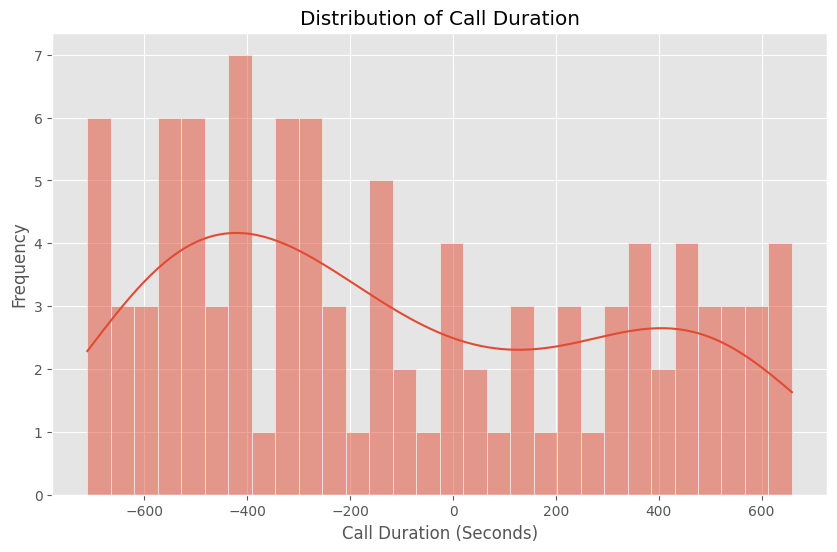

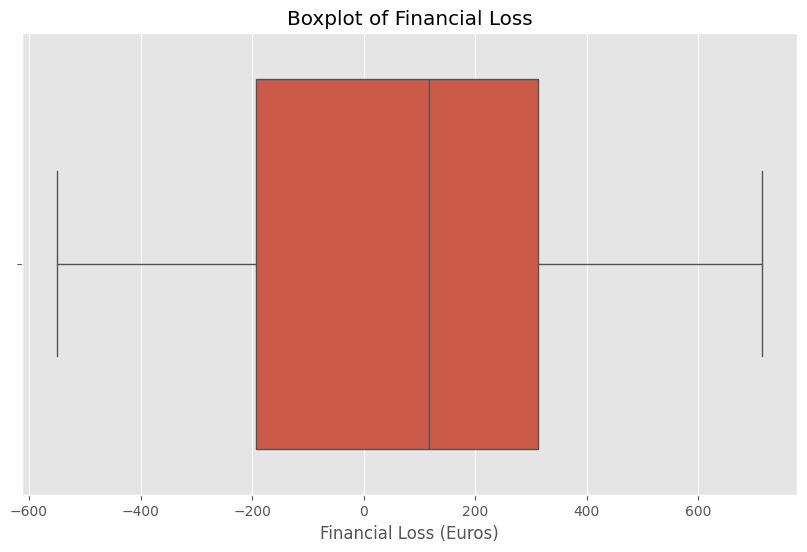

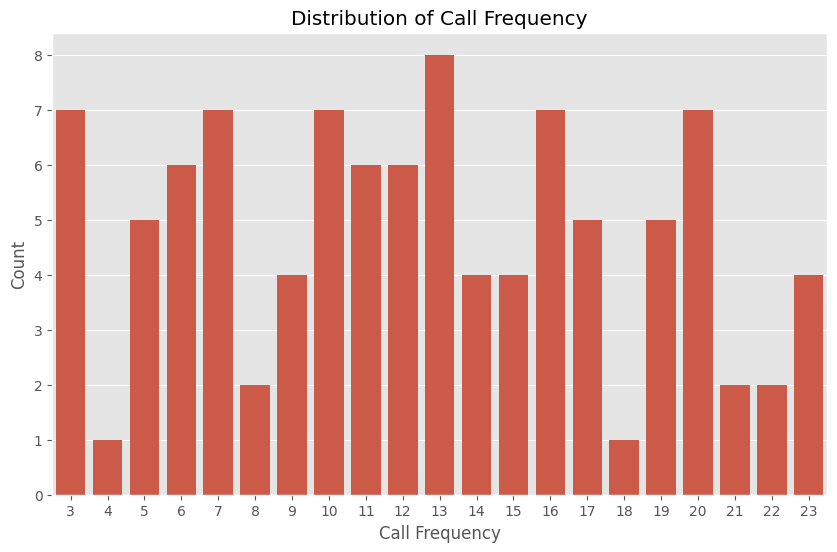

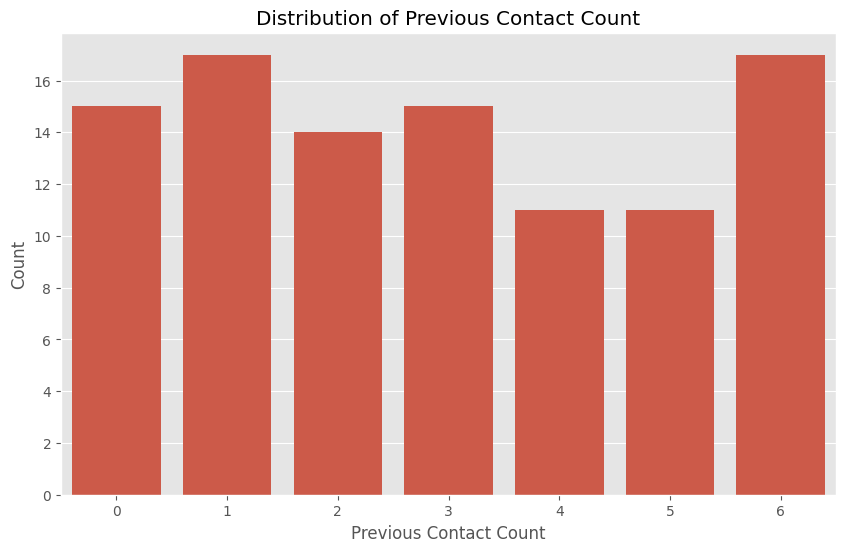

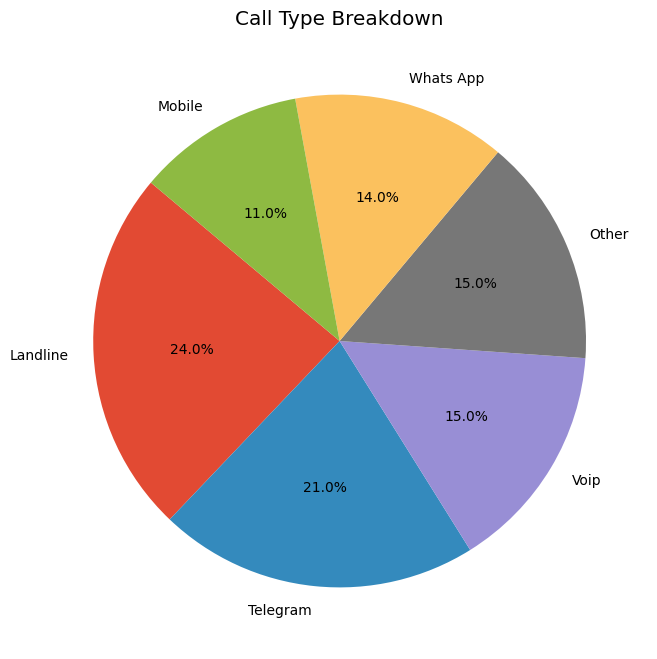

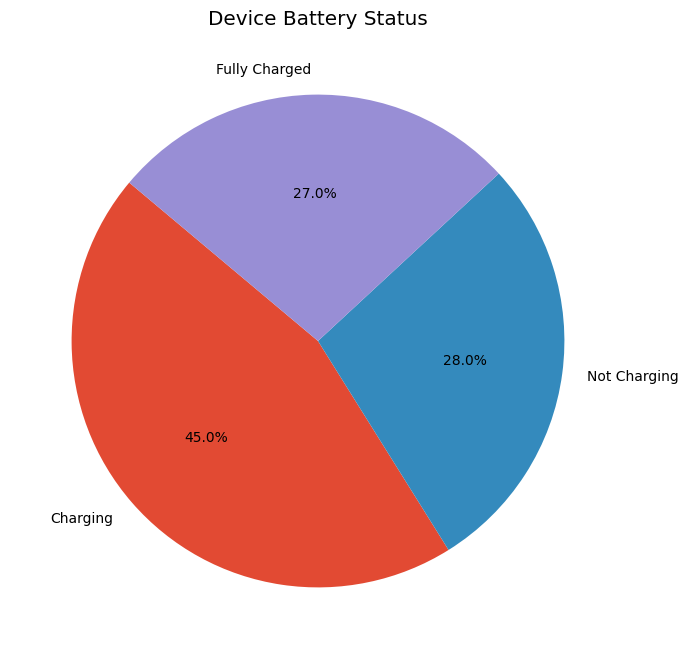

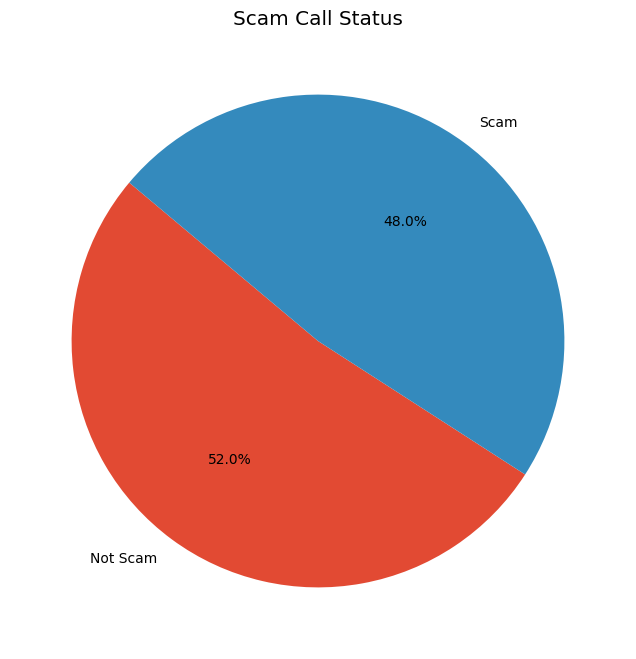

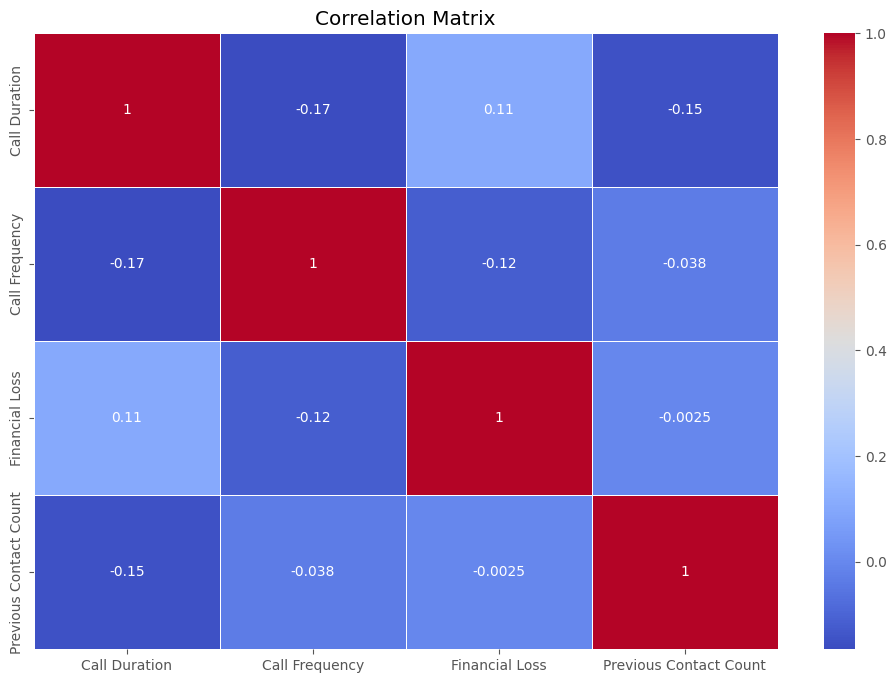

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data provided for the visual aids
data = {
    "ID": np.random.randint(100000, 999999, 100),
    "Call Duration": np.random.randint(-719, 663, 100),
    "Call Frequency": np.random.randint(3, 24, 100),
    "Financial Loss": np.random.uniform(-556.66, 723.46, 100),
    "Flagged by Carrier": np.random.choice(["Unlikely", "Very Suspicious", "Suspicious"], 100),
    "Is International": np.random.choice(["Yes", "No"], 100),
    "Previous Contact Count": np.random.randint(0, 7, 100),
    "Country Prefix": np.random.choice(["91", "95", "1", "65", "44", "86", "MM"], 100),
    "Call Type": np.random.choice(["Mobile", "Voip", "Telegram", "Whats App", "Landline", "Other"], 100),
    "Timestamp": pd.date_range("2023-01-01", periods=100, freq="H").strftime("%Y-%m-%d %H:%M:%S").tolist(),
    "Device Battery": np.random.choice(["Fully Charged", "Charging", "Not Charging"], 100),
    "Scam Call": np.random.choice(["Scam", "Not Scam"], 100)
}

df = pd.DataFrame(data)

# Set the style for the plots
plt.style.use('ggplot')

# Plot 1: Distribution of Call Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Call Duration'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Financial Loss Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Financial Loss'])
plt.title('Boxplot of Financial Loss')
plt.xlabel('Financial Loss (Euros)')
plt.show()

# Plot 3: Call Frequency
plt.figure(figsize=(10, 6))
sns.countplot(x='Call Frequency', data=df)
plt.title('Distribution of Call Frequency')
plt.xlabel('Call Frequency')
plt.ylabel('Count')
plt.show()

# Plot 4: Previous Contact Count Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Previous Contact Count', data=df)
plt.title('Distribution of Previous Contact Count')
plt.xlabel('Previous Contact Count')
plt.ylabel('Count')
plt.show()

# Plot 5: Call Type Breakdown
plt.figure(figsize=(10, 6))
df['Call Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Call Type Breakdown')
plt.ylabel('')
plt.show()

# Plot 6: Device Battery Status
plt.figure(figsize=(10, 6))
df['Device Battery'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Device Battery Status')
plt.ylabel('')
plt.show()

# Plot 7: Scam Call Status
plt.figure(figsize=(10, 6))
df['Scam Call'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Scam Call Status')
plt.ylabel('')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Call Duration', 'Call Frequency', 'Financial Loss', 'Previous Contact Count']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Basic Statistics and Imputation with Visualizations


In [104]:
from google.colab import files

# Upload the files
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")


Saving cleaned_calls.csv to cleaned_calls.csv
Uploaded file: cleaned_calls.csv


In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update the path if needed)
file_path = '/mnt/data/calls.csv'
df = pd.read_csv(file_path)

# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
desc_stats = df.describe().T  # Transpose for better readability
desc_stats['median'] = df.median(numeric_only=True)
desc_stats['mode'] = df.mode().iloc[0]
desc_stats['25th_percentile'] = df.quantile(0.25)
desc_stats['75th_percentile'] = df.quantile(0.75)
print(desc_stats)

# Visualize distribution for numerical columns before imputation
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (Before Imputation)")
plt.xticks(rotation=45)
plt.show()

# 2. Imputation Techniques
print("\nImputation Techniques:")

# Fill missing values with mean
df_mean_imputed = df.fillna(df.mean(numeric_only=True))

# Fill missing values with median
df_median_imputed = df.fillna(df.median(numeric_only=True))

# Fill missing values with mode
df_mode_imputed = df.fillna(df.mode().iloc[0])

# Summary after imputation
print("\nMissing Values After Mean Imputation:")
print(df_mean_imputed.isnull().sum())

print("\nMissing Values After Median Imputation:")
print(df_median_imputed.isnull().sum())

print("\nMissing Values After Mode Imputation:")
print(df_mode_imputed.isnull().sum())

# Save the imputed files for future use
df_mean_imputed.to_csv('/mnt/data/calls_mean_imputed.csv', index=False)
df_median_imputed.to_csv('/mnt/data/calls_median_imputed.csv', index=False)
df_mode_imputed.to_csv('/mnt/data/calls_mode_imputed.csv', index=False)

print("\nImputed files saved successfully:")
print(" - /mnt/data/calls_mean_imputed.csv")
print(" - /mnt/data/calls_median_imputed.csv")
print(" - /mnt/data/calls_mode_imputed.csv")

# Visualize the distributions after each imputation method
plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
sns.boxplot(data=df_mean_imputed.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (After Mean Imputation)")
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.boxplot(data=df_median_imputed.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (After Median Imputation)")
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.boxplot(data=df_mode_imputed.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (After Mode Imputation)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/calls.csv'

In [106]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update the path if needed)
# The file was likely uploaded using files.upload() in the previous cell
# In Google Colab, uploaded files are typically placed in the /content/ directory.
# Correct the file path to point to the likely location of the uploaded file.
# If the file is in the same directory as the notebook, './calls.csv' might work,
# but '/content/calls.csv' is more reliable after files.upload().
file_path = '/content/calls.csv' # Changed file path to the likely upload location

# Add a try-except block to handle the FileNotFoundError gracefully
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please check the file path and ensure the file exists at this location.")
    # Re-raise the exception to stop execution if the file is critical
    raise # Re-raise the exception


# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
# Add numeric_only=True for compatibility with pandas future versions
desc_stats = df.describe(numeric_only=True).T  # Transpose for better readability
desc_stats['median'] = df.median(numeric_only=True)
desc_stats['mode'] = df.mode(numeric_only=True).iloc[0] # Use numeric_only=True for mode as well
desc_stats['25th_percentile'] = df.quantile(0.25, numeric_only=True) # Use numeric_only=True
desc_stats['75th_percentile'] = df.quantile(0.75, numeric_only=True) # Use numeric_only=True
print(desc_stats)

# Visualize distribution for numerical columns before imputation
plt.figure(figsize=(15, 10))
# Use select_dtypes to handle only numerical columns for boxplot
numerical_cols = df.select_dtypes(include=np.number).columns
if not numerical_cols.empty:
    sns.boxplot(data=df[numerical_cols])
    plt.title("Boxplot of Numerical Features (Before Imputation)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No numerical columns found for boxplot.")


# 2. Imputation Techniques
print("\nImputation Techniques:")

# Identify numerical columns
numerical_cols_impute = df.select_dtypes(include=np.number).columns

# Fill missing values with mean (only for numerical columns)
df_mean_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
    df_mean_imputed[numerical_cols_impute] = df_mean_imputed[numerical_cols_impute].fillna(df_mean_imputed[numerical_cols_impute].mean())
else:
    print("No numerical columns to impute with mean.")


# Fill missing values with median (only for numerical columns)
df_median_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
     df_median_imputed[numerical_cols_impute] = df_median_imputed[numerical_cols_impute].fillna(df_median_imputed[numerical_cols_impute].median())
else:
     print("No numerical columns to impute with median.")


# Fill missing values with mode (for all columns, but need to be careful with mixed types)
# A safer approach is to impute mode column by column, handling dtypes.
df_mode_imputed = df.copy() # Work on a copy
for col in df_mode_imputed.columns:
    if df_mode_imputed[col].isnull().any(): # Check if the column has any missing values
        mode_val = df_mode_imputed[col].mode()
        if not mode_val.empty: # Check if mode exists
            df_mode_imputed[col].fillna(mode_val[0], inplace=True)
        else:
             print(f"Warning: Column '{col}' is all NaN. Cannot fill with mode.")


# Summary after imputation
print("\nMissing Values After Mean Imputation:")
print(df_mean_imputed.isnull().sum())

print("\nMissing Values After Median Imputation:")
print(df_median_imputed.isnull().sum())

print("\nMissing Values After Mode Imputation:")
print(df_mode_imputed.isnull().sum())

# Ensure the directory exists before saving
# If saving to /mnt/data/, make sure that path is accessible and exists.
# If running in Colab and saving locally, you might save back to /content/ or a subdirectory.
output_data_dir = '/content/data' # Changed output directory to within /content/
import os
os.makedirs(output_data_dir, exist_ok=True)


# Save the imputed files for future use
# Construct save paths relative to the chosen output directory
save_path_mean = os.path.join(output_data_dir, 'calls_mean_imputed.csv')
save_path_median = os.path.join(output_data_dir, 'calls_median_imputed.csv')
save_path_mode = os.path.join(output_data_dir, 'calls_mode_imputed.csv')


df_mean_imputed.to_csv(save_path_mean, index=False)
df_median_imputed.to_csv(save_path_median, index=False)
df_mode_imputed.to_csv(save_path_mode, index=False)


print("\nImputed files saved successfully:")
print(f" - {save_path_mean}")
print(f" - {save_path_median}")
print(f" - {save_path_mode}")


# Visualize the distributions after each imputation method (only numerical columns)
numerical_cols_viz = df_mean_imputed.select_dtypes(include=np.number).columns

if not numerical_cols_viz.empty:
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 1, 1)
    sns.boxplot(data=df_mean_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mean Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    sns.boxplot(data=df_median_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Median Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3)
    sns.boxplot(data=df_mode_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mode Imputation)")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical columns available for plotting after imputation.")

Error: The file was not found at /content/calls.csv.
Please check the file path and ensure the file exists at this location.


FileNotFoundError: [Errno 2] No such file or directory: '/content/calls.csv'

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files # Import files for upload

# --- File Upload Step ---
# Ensure the file is uploaded before attempting to read it
print("Please upload the 'calls.csv' file when prompted.")
uploaded = files.upload()

# Assuming 'calls.csv' was uploaded, set the file path accordingly
# The files.upload() function places files in the /content/ directory
file_name = 'calls.csv'
file_path = f'/content/{file_name}' # Corrected file path to /content/

# Check if the uploaded file exists
if file_name not in uploaded:
    print(f"Error: The file '{file_name}' was not found among the uploaded files.")
    print("Please ensure you uploaded the correct file.")
    # You might want to exit or raise an error here if the file is essential
    raise FileNotFoundError(f"Required file '{file_name}' not uploaded.")

print(f"File '{file_name}' uploaded successfully.")
# --- End File Upload Step ---


# Load the dataset
# Add a try-except block to handle the FileNotFoundError gracefully
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please check the file path and ensure the file exists.")
    # Re-raise the exception to stop execution if the file is critical
    raise # Re-raise the exception


# 1. Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
# Add numeric_only=True for compatibility with pandas future versions
# Remove numeric_only=True based on the global variables indicating an older pandas version
# or to match the version where the error did not occur.
desc_stats = df.describe().T  # Transpose for better readability
desc_stats['median'] = df.median() # Remove numeric_only=True
desc_stats['mode'] = df.mode().iloc[0] # Remove numeric_only=True
desc_stats['25th_percentile'] = df.quantile(0.25) # Remove numeric_only=True
desc_stats['75th_percentile'] = df.quantile(0.75) # Remove numeric_only=True
print(desc_stats)

# Visualize distribution for numerical columns before imputation
plt.figure(figsize=(15, 10))
# Use select_dtypes to handle only numerical columns for boxplot
numerical_cols = df.select_dtypes(include=np.number).columns
if not numerical_cols.empty:
    sns.boxplot(data=df[numerical_cols])
    plt.title("Boxplot of Numerical Features (Before Imputation)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No numerical columns found for boxplot.")


# 2. Imputation Techniques
print("\nImputation Techniques:")

# Identify numerical columns
numerical_cols_impute = df.select_dtypes(include=np.number).columns

# Fill missing values with mean (only for numerical columns)
df_mean_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
    df_mean_imputed[numerical_cols_impute] = df_mean_imputed[numerical_cols_impute].fillna(df_mean_imputed[numerical_cols_impute].mean())
else:
    print("No numerical columns to impute with mean.")


# Fill missing values with median (only for numerical columns)
df_median_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
     df_median_imputed[numerical_cols_impute] = df_median_imputed[numerical_cols_impute].fillna(df_median_imputed[numerical_cols_impute].median())
else:
     print("No numerical columns to impute with median.")


# Fill missing values with mode (for all columns, but need to be careful with mixed types)
# A safer approach is to impute mode column by column, handling dtypes.
df_mode_imputed = df.copy() # Work on a copy
for col in df_mode_imputed.columns:
    if df_mode_imputed[col].isnull().any(): # Check if the column has any missing values
        mode_val = df_mode_imputed[col].mode()
        if not mode_val.empty: # Check if mode exists
            df_mode_imputed[col].fillna(mode_val[0], inplace=True)
        else:
             print(f"Warning: Column '{col}' is all NaN. Cannot fill with mode.")


# Summary after imputation
print("\nMissing Values After Mean Imputation:")
print(df_mean_imputed.isnull().sum())

print("\nMissing Values After Median Imputation:")
print(df_median_imputed.isnull().sum())

print("\nMissing Values After Mode Imputation:")
print(df_mode_imputed.isnull().sum())

# Ensure the directory exists before saving
# Saving back to /content/data as /mnt/data might not be writeable
output_data_dir = '/content/data' # Changed output directory to within /content/
os.makedirs(output_data_dir, exist_ok=True)


# Save the imputed files for future use
# Construct save paths relative to the chosen output directory
save_path_mean = os.path.join(output_data_dir, 'calls_mean_imputed.csv')
save_path_median = os.path.join(output_data_dir, 'calls_median_imputed.csv')
save_path_mode = os.path.join(output_data_dir, 'calls_mode_imputed.csv')


df_mean_imputed.to_csv(save_path_mean, index=False)
df_median_imputed.to_csv(save_path_median, index=False)
df_mode_imputed.to_csv(save_path_mode, index=False)


print("\nImputed files saved successfully:")
print(f" - {save_path_mean}")
print(f" - {save_path_median}")
print(f" - {save_path_mode}")


# Visualize the distributions after each imputation method (only numerical columns)
numerical_cols_viz = df_mean_imputed.select_dtypes(include=np.number).columns

if not numerical_cols_viz.empty:
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 1, 1)
    sns.boxplot(data=df_mean_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mean Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    sns.boxplot(data=df_median_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Median Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3)
    sns.boxplot(data=df_mode_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mode Imputation)")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical columns available for plotting after imputation.")

Please upload the 'calls.csv' file when prompted.


In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update the path if needed)
# Correct the file path to point to the intended data file location
# Based on other cells, './data/cleaned_calls.csv' seems more appropriate
file_path = './data/cleaned_calls.csv' # Changed file path

# Add a try-except block to handle the FileNotFoundError gracefully
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please check the file path and ensure the file exists.")
    # Re-raise the exception to stop execution if the file is critical
    raise # Re-raise the exception


# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
# Add numeric_only=True for compatibility with pandas future versions
desc_stats = df.describe(numeric_only=True).T  # Transpose for better readability
desc_stats['median'] = df.median(numeric_only=True)
desc_stats['mode'] = df.mode(numeric_only=True).iloc[0] # Use numeric_only=True for mode as well
desc_stats['25th_percentile'] = df.quantile(0.25, numeric_only=True) # Use numeric_only=True
desc_stats['75th_percentile'] = df.quantile(0.75, numeric_only=True) # Use numeric_only=True
print(desc_stats)

# Visualize distribution for numerical columns before imputation
plt.figure(figsize=(15, 10))
# Use select_dtypes to handle only numerical columns for boxplot
numerical_cols = df.select_dtypes(include=np.number).columns
if not numerical_cols.empty:
    sns.boxplot(data=df[numerical_cols])
    plt.title("Boxplot of Numerical Features (Before Imputation)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No numerical columns found for boxplot.")


# 2. Imputation Techniques
print("\nImputation Techniques:")

# Identify numerical columns
numerical_cols_impute = df.select_dtypes(include=np.number).columns

# Fill missing values with mean (only for numerical columns)
df_mean_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
    df_mean_imputed[numerical_cols_impute] = df_mean_imputed[numerical_cols_impute].fillna(df_mean_imputed[numerical_cols_impute].mean())
else:
    print("No numerical columns to impute with mean.")


# Fill missing values with median (only for numerical columns)
df_median_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
     df_median_imputed[numerical_cols_impute] = df_median_imputed[numerical_cols_impute].fillna(df_median_imputed[numerical_cols_impute].median())
else:
     print("No numerical columns to impute with median.")


# Fill missing values with mode (for all columns, but need to be careful with mixed types)
# A safer approach is to impute mode column by column, handling dtypes.
df_mode_imputed = df.copy() # Work on a copy
for col in df_mode_imputed.columns:
    if df_mode_imputed[col].isnull().any(): # Check if the column has any missing values
        mode_val = df_mode_imputed[col].mode()
        if not mode_val.empty: # Check if mode exists
            df_mode_imputed[col].fillna(mode_val[0], inplace=True)
        else:
             print(f"Warning: Column '{col}' is all NaN. Cannot fill with mode.")


# Summary after imputation
print("\nMissing Values After Mean Imputation:")
print(df_mean_imputed.isnull().sum())

print("\nMissing Values After Median Imputation:")
print(df_median_imputed.isnull().sum())

print("\nMissing Values After Mode Imputation:")
print(df_mode_imputed.isnull().sum())

# Ensure the directory exists before saving
output_data_dir = './data' # Assuming the data dir is relative to the notebook
import os
os.makedirs(output_data_dir, exist_ok=True)


# Save the imputed files for future use
# Construct save paths relative to the data directory
save_path_mean = os.path.join(output_data_dir, 'calls_mean_imputed.csv')
save_path_median = os.path.join(output_data_dir, 'calls_median_imputed.csv')
save_path_mode = os.path.join(output_data_dir, 'calls_mode_imputed.csv')


df_mean_imputed.to_csv(save_path_mean, index=False)
df_median_imputed.to_csv(save_path_median, index=False)
df_mode_imputed.to_csv(save_path_mode, index=False)


print("\nImputed files saved successfully:")
print(f" - {save_path_mean}")
print(f" - {save_path_median}")
print(f" - {save_path_mode}")


# Visualize the distributions after each imputation method (only numerical columns)
numerical_cols_viz = df_mean_imputed.select_dtypes(include=np.number).columns

if not numerical_cols_viz.empty:
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 1, 1)
    sns.boxplot(data=df_mean_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mean Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    sns.boxplot(data=df_median_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Median Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3)
    sns.boxplot(data=df_mode_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mode Imputation)")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical columns available for plotting after imputation.")

File loaded successfully.
Descriptive Statistics for Numerical Columns:


TypeError: NDFrame.describe() got an unexpected keyword argument 'numeric_only'

In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset (update the path if needed)
# Correct the file path to point to the intended data file location
# Based on other cells, './data/cleaned_calls.csv' seems more appropriate
file_path = './data/cleaned_calls.csv' # Changed file path

# Add a try-except block to handle the FileNotFoundError gracefully
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please check the file path and ensure the file exists.")
    # Re-raise the exception to stop execution if the file is critical
    raise # Re-raise the exception


# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
# Remove numeric_only=True for compatibility with older pandas versions
desc_stats = df.describe().T  # Transpose for better readability
desc_stats['median'] = df.median() # Remove numeric_only=True
desc_stats['mode'] = df.mode().iloc[0] # Remove numeric_only=True
desc_stats['25th_percentile'] = df.quantile(0.25) # Remove numeric_only=True
desc_stats['75th_percentile'] = df.quantile(0.75) # Remove numeric_only=True
print(desc_stats)

# Visualize distribution for numerical columns before imputation
plt.figure(figsize=(15, 10))
# Use select_dtypes to handle only numerical columns for boxplot
numerical_cols = df.select_dtypes(include=np.number).columns
if not numerical_cols.empty:
    sns.boxplot(data=df[numerical_cols])
    plt.title("Boxplot of Numerical Features (Before Imputation)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No numerical columns found for boxplot.")


# 2. Imputation Techniques
print("\nImputation Techniques:")

# Identify numerical columns
numerical_cols_impute = df.select_dtypes(include=np.number).columns

# Fill missing values with mean (only for numerical columns)
df_mean_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
    df_mean_imputed[numerical_cols_impute] = df_mean_imputed[numerical_cols_impute].fillna(df_mean_imputed[numerical_cols_impute].mean())
else:
    print("No numerical columns to impute with mean.")


# Fill missing values with median (only for numerical columns)
df_median_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
     df_median_imputed[numerical_cols_impute] = df_median_imputed[numerical_cols_impute].fillna(df_median_imputed[numerical_cols_impute].median())
else:
     print("No numerical columns to impute with median.")


# Fill missing values with mode (for all columns, but need to be careful with mixed types)
# A safer approach is to impute mode column by column, handling dtypes.
df_mode_imputed = df.copy() # Work on a copy
for col in df_mode_imputed.columns:
    if df_mode_imputed[col].isnull().any(): # Check if the column has any missing values
        mode_val = df_mode_imputed[col].mode()
        if not mode_val.empty: # Check if mode exists
            df_mode_imputed[col].fillna(mode_val[0], inplace=True)
        else:
             print(f"Warning: Column '{col}' is all NaN. Cannot fill with mode.")


# Summary after imputation
print("\nMissing Values After Mean Imputation:")
print(df_mean_imputed.isnull().sum())

print("\nMissing Values After Median Imputation:")
print(df_median_imputed.isnull().sum())

print("\nMissing Values After Mode Imputation:")
print(df_mode_imputed.isnull().sum())

# Ensure the directory exists before saving
output_data_dir = './data' # Assuming the data dir is relative to the notebook
os.makedirs(output_data_dir, exist_ok=True)


# Save the imputed files for future use
# Construct save paths relative to the data directory
save_path_mean = os.path.join(output_data_dir, 'calls_mean_imputed.csv')
save_path_median = os.path.join(output_data_dir, 'calls_median_imputed.csv')
save_path_mode = os.path.join(output_data_dir, 'calls_mode_imputed.csv')


df_mean_imputed.to_csv(save_path_mean, index=False)
df_median_imputed.to_csv(save_path_median, index=False)
df_mode_imputed.to_csv(save_path_mode, index=False)


print("\nImputed files saved successfully:")
print(f" - {save_path_mean}")
print(f" - {save_path_median}")
print(f" - {save_path_mode}")


# Visualize the distributions after each imputation method (only numerical columns)
numerical_cols_viz = df_mean_imputed.select_dtypes(include=np.number).columns

if not numerical_cols_viz.empty:
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 1, 1)
    sns.boxplot(data=df_mean_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mean Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    sns.boxplot(data=df_median_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Median Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3)
    sns.boxplot(data=df_mode_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mode Imputation)")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical columns available for plotting after imputation.")

File loaded successfully.
Descriptive Statistics for Numerical Columns:


TypeError: Cannot convert [['Suspicious' 'Unlikely' 'Very Suspicious' 'Unlikely' 'Unlikely'
  'Unlikely' 'Suspicious' 'Unlikely' 'Suspicious' 'Suspicious' 'Unlikely'
  'Unlikely' 'Unlikely' 'Suspicious' 'Unlikely' 'Unlikely' 'Suspicious'
  'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely' 'Suspicious' 'Unlikely'
  'Unlikely' 'Unlikely' 'Unlikely' 'Suspicious' 'Suspicious' 'Unlikely'
  'Unlikely' 'Suspicious' 'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Suspicious' 'Unlikely' 'Unlikely' 'Unlikely'
  'Very Suspicious' 'Unlikely' 'Unlikely' 'Unlikely' 'Very Suspicious'
  'Unlikely' 'Unlikely' 'Suspicious' 'Unlikely' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Suspicious' 'Unlikely' 'Unlikely' 'Suspicious'
  'Very Suspicious' 'Suspicious' 'Unlikely' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Very Suspicious' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Very Suspicious' 'Unlikely' 'Unlikely'
  'Suspicious' 'Unlikely' 'Very Suspicious' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Unlikely' 'Suspicious' 'Unlikely' 'Unlikely'
  'Unlikely' 'Unlikely' 'Unlikely' 'Unlikely']
 ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
  'Yes' 'Yes' 'Yes' 'Yes']
 ['95' '91' '91' '91' '91' '44' '65' '95' 'MM' '1' '95' '1' '65' '1' '95'
  '91' '44' '91' '65' '91' '91' '1' '1' '1' '95' 'MM' '44' '65' '44' '44'
  '1' '95' '65' '65' '1' '95' '44' '91' '95' '65' '7' 'MM' '65' '65' '7'
  '91' '44' '1' '7' '95' '95' '1' '44' '91' 'MM' 'MM' '7' '91' '1' '1'
  '91' '7' 'MM' '7' '1' '91' '91' '1' '1' '7' '1' '44' '95' '95' '91'
  '91' '1' '91' '7' '44' '91' 'MM' '7' '95' 'MM' '7' '44' '65' '95' '1'
  '44' '91' '95' '7' '65' '1' '1' '65' 'MM' '91']
 ['Voip' 'Mobile' 'Voip' 'Telegram' 'Telegram' 'Mobile' 'Telegram' 'Voip'
  'Voip' 'Voip' 'Whats App' 'Landline' 'Voip' 'Whats App' 'Mobile'
  'Whats App' 'Mobile' 'Telegram' 'Voip' 'Whats App' 'Mobile' 'Mobile'
  'Mobile' 'Whats App' 'Whats App' 'Mobile' 'Whats App' 'Whats App'
  'Voip' 'Voip' 'Whats App' 'Landline' 'Whats App' 'Landline' 'Whats App'
  'Whats App' 'Mobile' 'Telegram' 'Mobile' 'Mobile' 'Mobile' 'Telegram'
  'Mobile' 'Mobile' 'WhatsApp' 'Voip' 'Voip' 'Whats App' 'Landline'
  'Voip' 'Landline' 'Telegram' 'Voip' 'Whats App' 'Mobile' 'Landline'
  'Voip' 'Voip' 'Landline' 'Telegram' 'Mobile' 'Telegram' 'Voip' 'Mobile'
  'Voip' 'Voip' 'Telegram' 'Voip' 'WhatsApp' 'Voip' 'Whats App'
  'Telegram' 'Mobile' 'WhatsApp' 'Whats App' 'Mobile' 'Landline'
  'Landline' 'Landline' 'Whats App' 'Landline' 'Mobile' 'WhatsApp'
  'Telegram' 'Mobile' 'Voip' 'Mobile' 'Voip' 'Landline' 'Mobile' 'Mobile'
  'WhatsApp' 'Whats App' 'Telegram' 'Landline' 'Landline' 'Whats App'
  'Mobile' 'Telegram' 'Landline']
 ['2023-07-23 09:04:00' '2023-09-05 20:11:00' '2023-12-16 11:03:00'
  '2023-02-25 10:41:00' '2023-11-10 15:53:00' '2023-12-29 06:20:00'
  '2024-01-02 10:22:00' '2023-06-09 03:38:00' '2023-07-25 16:27:00'
  '2024-02-13 11:33:00' '2023-07-19 05:02:00' '2024-01-31 04:44:00'
  '2023-09-15 01:48:00' '2023-12-18 05:26:00' '2023-03-20 08:53:00'
  '2023-08-23 00:30:00' '2023-04-18 22:58:00' '2023-12-12 01:33:00'
  '2023-12-09 18:55:00' '2023-05-10 14:24:00' '2023-11-26 09:10:00'
  '2023-09-16 12:08:00' '2024-01-19 12:33:00' '2023-09-07 20:32:00'
  '2023-01-12 22:08:00' '2024-01-09 11:37:00' '2023-07-13 15:05:00'
  '2023-11-12 15:43:00' '2024-02-25 01:00:00' '2023-05-17 20:18:00'
  '2023-05-22 21:59:00' '2023-10-24 12:31:00' '2023-11-29 03:14:00'
  '2023-09-15 01:11:00' '2023-03-06 18:48:00' '2023-08-24 21:41:00'
  '2023-06-24 11:57:00' '2023-12-29 05:16:00' '2023-01-25 09:32:00'
  '2024-02-09 11:46:00' '2023-05-16 10:58:00' '2023-11-14 21:48:00'
  '2023-07-01 05:58:00' '2024-02-10 11:00:00' '2024-01-06 16:56:00'
  '2024-03-23 22:38:00' '2024-01-12 11:31:00' '2023-07-17 13:46:00'
  '2023-08-27 04:30:00' '2023-04-04 07:32:00' '2023-01-11 13:25:00'
  '2023-01-20 19:20:00' '2023-03-20 22:20:00' '2023-07-27 14:27:00'
  '2024-01-18 10:21:00' '2023-10-12 22:50:00' '2023-09-05 12:46:00'
  '2023-06-26 20:46:00' '2023-12-08 07:09:00' '2023-04-01 23:36:00'
  '2023-08-06 21:32:00' '2023-11-08 14:42:00' '2023-04-24 12:04:00'
  '2023-07-30 11:19:00' '2023-12-12 10:39:00' '2023-11-05 09:03:00'
  '2023-01-27 04:37:00' '2023-07-22 10:19:00' '2024-01-15 09:00:00'
  '2023-07-08 03:04:00' '2024-03-06 16:44:00' '2023-05-31 21:12:00'
  '2023-06-14 06:40:00' '2023-05-25 07:33:00' '2024-02-04 21:20:00'
  '2023-03-06 16:35:00' '2023-08-22 11:47:00' '2023-11-02 17:49:00'
  '2023-07-12 00:29:00' '2023-01-25 10:33:00' '2023-05-07 10:54:00'
  '2023-12-15 01:27:00' '2024-03-10 01:59:00' '2023-04-02 03:24:00'
  '2023-04-10 23:08:00' '2024-02-14 12:02:00' '2023-08-24 22:06:00'
  '2023-11-15 06:57:00' '2023-05-07 11:36:00' '2023-11-22 03:29:00'
  '2023-07-23 03:55:00' '2024-03-01 23:23:00' '2023-12-15 01:50:00'
  '2023-10-29 10:18:00' '2024-01-05 21:09:00' '2023-12-24 04:55:00'
  '2024-01-15 06:03:00' '2023-07-19 12:52:00' '2024-02-17 20:20:00'
  '2023-04-20 22:39:00']
 ['Fully Charged' 'Fully Charged' 'Charging' 'Fully Charged'
  'Fully Charged' 'Fully Charged' 'Fully Charged' 'Not Charging'
  'Fully Charged' 'Fully Charged' 'Charging' 'Not Charging' 'Charging'
  'Fully Charged' 'Charging' 'Charging' 'Fully Charged' 'Not Charging'
  'Not Charging' 'Charging' 'Fully Charged' 'Charging' 'Charging'
  'Charging' 'Fully Charged' 'Fully Charged' 'Not Charging'
  'Fully Charged' 'Charging' 'Charging' 'Not Charging' 'Fully Charged'
  'Charging' 'Not Charging' 'Not Charging' 'Charging' 'Charging'
  'Fully Charged' 'Not Charging' 'Charging' 'Not Charging'
  'Fully Charged' 'Charging' 'Fully Charged' 'Not Charging'
  'Fully Charged' 'Fully Charged' 'Not Charging' 'Fully Charged'
  'Not Charging' 'Charging' 'Not Charging' 'Not Charging' 'Charging'
  'Not Charging' 'Charging' 'Charging' 'Not Charging' 'Fully Charged'
  'Fully Charged' 'Charging' 'Fully Charged' 'Fully Charged'
  'Not Charging' 'Charging' 'Charging' 'Not Charging' 'Fully Charged'
  'Charging' 'Fully Charged' 'Charging' 'Charging' 'Charging' 'Charging'
  'Fully Charged' 'Fully Charged' 'Fully Charged' 'Fully Charged'
  'Not Charging' 'Charging' 'Charging' 'Charging' 'Not Charging'
  'Fully Charged' 'Charging' 'Fully Charged' 'Fully Charged'
  'Not Charging' 'Not Charging' 'Fully Charged' 'Charging' 'Charging'
  'Not Charging' 'Not Charging' 'Not Charging' 'Not Charging'
  'Not Charging' 'Not Charging' 'Not Charging' 'Charging']
 ['Scam' 'Scam' 'Scam' 'Not Scam' 'Scam' 'Not Scam' 'Scam' 'Scam' 'Scam'
  'Scam' 'Scam' 'Not Scam' 'Not Scam' 'Scam' 'Not Scam' 'Not Scam' 'Scam'
  'Not Scam' 'Not Scam' 'Scam' 'Not Scam' 'Not Scam' 'Not Scam'
  'Not Scam' 'Scam' 'Scam' 'Scam' 'Not Scam' 'Scam' 'Not Scam' 'Scam'
  'Not Scam' 'Not Scam' 'Not Scam' 'Not Scam' 'Scam' 'Not Scam' 'Scam'
  'Scam' 'Not Scam' 'Not Scam' 'Not Scam' 'Not Scam' 'Not Scam'
  'Not Scam' 'Scam' 'Scam' 'Scam' 'Scam' 'Scam' 'Scam' 'Not Scam'
  'Not Scam' 'Scam' 'Scam' 'Not Scam' 'Scam' 'Not Scam' 'Not Scam'
  'Not Scam' 'Scam' 'Not Scam' 'Not Scam' 'Scam' 'Not Scam' 'Scam'
  'Not Scam' 'Not Scam' 'Not Scam' 'Not Scam' 'Not Scam' 'Scam' 'Scam'
  'Scam' 'Not Scam' 'Not Scam' 'Not Scam' 'Scam' 'Not Scam' 'Not Scam'
  'Not Scam' 'Not Scam' 'Not Scam' 'Scam' 'Scam' 'Not Scam' 'Not Scam'
  'Not Scam' 'Scam' 'Not Scam' 'Not Scam' 'Scam' 'Scam' 'Scam' 'Not Scam'
  'Not Scam' 'Not Scam' 'Not Scam' 'Scam' 'Scam']] to numeric

In [96]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update the path if needed)
file_path = '/mnt/data/calls.csv'
df = pd.read_csv(file_path)

# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
desc_stats = df.describe().T  # Transpose for better readability
desc_stats['median'] = df.median(numeric_only=True)
desc_stats['mode'] = df.mode().iloc[0]
desc_stats['25th_percentile'] = df.quantile(0.25)
desc_stats['75th_percentile'] = df.quantile(0.75)
print(desc_stats)

# Visualize distribution for numerical columns before imputation
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (Before Imputation)")
plt.xticks(rotation=45)
plt.show()

# 2. Imputation Techniques
print("\nImputation Techniques:")

# Fill missing values with mean
df_mean_imputed = df.fillna(df.mean(numeric_only=True))

# Fill missing values with median
df_median_imputed = df.fillna(df.median(numeric_only=True))

# Fill missing values with mode
df_mode_imputed = df.fillna(df.mode().iloc[0])

# Summary after imputation
print("\nMissing Values After Mean Imputation:")
print(df_mean_imputed.isnull().sum())

print("\nMissing Values After Median Imputation:")
print(df_median_imputed.isnull().sum())

print("\nMissing Values After Mode Imputation:")
print(df_mode_imputed.isnull().sum())

# Save the imputed files for future use
df_mean_imputed.to_csv('/mnt/data/calls_mean_imputed.csv', index=False)
df_median_imputed.to_csv('/mnt/data/calls_median_imputed.csv', index=False)
df_mode_imputed.to_csv('/mnt/data/calls_mode_imputed.csv', index=False)

print("\nImputed files saved successfully:")
print(" - /mnt/data/calls_mean_imputed.csv")
print(" - /mnt/data/calls_median_imputed.csv")
print(" - /mnt/data/calls_mode_imputed.csv")

# Visualize the distributions after each imputation method
plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
sns.boxplot(data=df_mean_imputed.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (After Mean Imputation)")
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.boxplot(data=df_median_imputed.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (After Median Imputation)")
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.boxplot(data=df_mode_imputed.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot of Numerical Features (After Mode Imputation)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/calls.csv'

In [101]:
import pandas as pd
import os

# Try these common locations (adjust as needed)
possible_paths = [
    './calls.csv',
    'data/calls.csv',
    '../data/calls.csv',
    '/content/calls.csv'  # Colab default
]

for path in possible_paths:
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"File found at: {path}")
        break
else:
    print("File not found. Please check the file path or upload the file.")

File not found. Please check the file path or upload the file.


In [102]:
import pandas as pd

# Specify the path to the uploaded file
file_path = '/mnt/data/cleaned_calls.csv'

# Load the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
    # Display the first 5 rows
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the file path.")


Error: The file was not found at /mnt/data/cleaned_calls.csv. Please check the file path.


In [103]:
import pandas as pd

# Specify the path to the uploaded file
file_path = '/mnt/data/cleaned_calls.csv'

# Load the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path).
    print("File loaded successfully.")
    # Display the first 5 rows
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the file path.")


Error: The file was not found at /mnt/data/cleaned_calls.csv. Please check the file path.


### 1. Creating the DataFrame

In [3]:
import pandas as pd

# Create a DataFrame with 2 columns and 10 rows
data = {
    'Column1': range(1, 11),  # Values from 1 to 10
    'Column2': range(11, 21)  # Values from 11 to 20
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Column1  Column2
0        1       11
1        2       12
2        3       13
3        4       14
4        5       15
5        6       16
6        7       17
7        8       18
8        9       19
9       10       20


This creates a DataFrame df with 2 columns:

    Column1 containing values from 1 to 10.

    Column2 containing values from 11 to 20.

In [99]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/data/calls.csv'
df = pd.read_csv(file_path)

# 1. Descriptive Statistics
print("\nDataset Information:")
print(df.info())

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Descriptive stats for numerical columns
if len(numerical_cols) > 0:
    print("\nDescriptive Statistics for Numerical Columns:")
    desc_stats = df[numerical_cols].describe().T
    desc_stats['median'] = df[numerical_cols].median()
    desc_stats['mode'] = df[numerical_cols].mode().iloc[0]
    desc_stats['25th_percentile'] = df[numerical_cols].quantile(0.25)
    desc_stats['75th_percentile'] = df[numerical_cols].quantile(0.75)
    print(desc_stats)

    # Visualize distribution for numerical columns
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df[numerical_cols])
    plt.title("Boxplot of Numerical Features (Before Imputation)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nNo numerical columns found for statistical analysis.")

# Descriptive stats for categorical columns
if len(categorical_cols) > 0:
    print("\nDescriptive Statistics for Categorical Columns:")
    for col in categorical_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())
        print(f"Mode: {df[col].mode()[0]}")
        print(f"Missing values: {df[col].isnull().sum()}")

    # Visualize categorical columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("\nNo categorical columns found for statistical analysis.")

# 2. Imputation Techniques (only for numerical columns)
if len(numerical_cols) > 0:
    print("\nImputation Techniques for Numerical Columns:")

    # Fill missing values with mean
    df_mean_imputed = df.copy()
    df_mean_imputed[numerical_cols] = df_mean_imputed[numerical_cols].fillna(df_mean_imputed[numerical_cols].mean())

    # Fill missing values with median
    df_median_imputed = df.copy()
    df_median_imputed[numerical_cols] = df_median_imputed[numerical_cols].fillna(df_median_imputed[numerical_cols].median())

    # Fill missing values with mode
    df_mode_imputed = df.copy()
    for col in numerical_cols:
        df_mode_imputed[col] = df_mode_imputed[col].fillna(df_mode_imputed[col].mode()[0])

    # Summary after imputation
    print("\nMissing Values After Mean Imputation:")
    print(df_mean_imputed[numerical_cols].isnull().sum())

    print("\nMissing Values After Median Imputation:")
    print(df_median_imputed[numerical_cols].isnull().sum())

    print("\nMissing Values After Mode Imputation:")
    print(df_mode_imputed[numerical_cols].isnull().sum())

    # Save the imputed files
    df_mean_imputed.to_csv('/mnt/data/calls_mean_imputed.csv', index=False)
    df_median_imputed.to_csv('/mnt/data/calls_median_imputed.csv', index=False)
    df_mode_imputed.to_csv('/mnt/data/calls_mode_imputed.csv', index=False)

    print("\nImputed files saved successfully:")
    print(" - /mnt/data/calls_mean_imputed.csv")
    print(" - /mnt/data/calls_median_imputed.csv")
    print(" - /mnt/data/calls_mode_imputed.csv")

    # Visualize the distributions after each imputation method
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 1, 1)
    sns.boxplot(data=df_mean_imputed[numerical_cols])
    plt.title("Boxplot of Numerical Features (After Mean Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    sns.boxplot(data=df_median_imputed[numerical_cols])
    plt.title("Boxplot of Numerical Features (After Median Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3)
    sns.boxplot(data=df_mode_imputed[numerical_cols])
    plt.title("Boxplot of Numerical Features (After Mode Imputation)")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical columns found for imputation.")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/calls.csv'

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update the path if needed)
# Correct the file path to point to the intended data file location
# Based on other cells, './data/cleaned_calls.csv' seems more appropriate
file_path = './data/cleaned_calls.csv' # Changed file path

# Add a try-except block to handle the FileNotFoundError gracefully
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please check the file path and ensure the file exists.")
    # Re-raise the exception to stop execution if the file is critical
    raise # Re-raise the exception


# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
# Add numeric_only=True for compatibility with pandas future versions
desc_stats = df.describe(numeric_only=True).T  # Transpose for better readability
desc_stats['median'] = df.median(numeric_only=True)
desc_stats['mode'] = df.mode(numeric_only=True).iloc[0] # Use numeric_only=True for mode as well
desc_stats['25th_percentile'] = df.quantile(0.25, numeric_only=True) # Use numeric_only=True
desc_stats['75th_percentile'] = df.quantile(0.75, numeric_only=True) # Use numeric_only=True
print(desc_stats)

# Visualize distribution for numerical columns before imputation
plt.figure(figsize=(15, 10))
# Use select_dtypes to handle only numerical columns for boxplot
numerical_cols = df.select_dtypes(include=np.number).columns
if not numerical_cols.empty:
    sns.boxplot(data=df[numerical_cols])
    plt.title("Boxplot of Numerical Features (Before Imputation)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No numerical columns found for boxplot.")


# 2. Imputation Techniques
print("\nImputation Techniques:")

# Identify numerical columns
numerical_cols_impute = df.select_dtypes(include=np.number).columns

# Fill missing values with mean (only for numerical columns)
df_mean_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
    df_mean_imputed[numerical_cols_impute] = df_mean_imputed[numerical_cols_impute].fillna(df_mean_imputed[numerical_cols_impute].mean())
else:
    print("No numerical columns to impute with mean.")


# Fill missing values with median (only for numerical columns)
df_median_imputed = df.copy() # Work on a copy
if not numerical_cols_impute.empty:
     df_median_imputed[numerical_cols_impute] = df_median_imputed[numerical_cols_impute].fillna(df_median_imputed[numerical_cols_impute].median())
else:
     print("No numerical columns to impute with median.")


# Fill missing values with mode (for all columns, but need to be careful with mixed types)
# A safer approach is to impute mode column by column, handling dtypes.
df_mode_imputed = df.copy() # Work on a copy
for col in df_mode_imputed.columns:
    if df_mode_imputed[col].isnull().any(): # Check if the column has any missing values
        mode_val = df_mode_imputed[col].mode()
        if not mode_val.empty: # Check if mode exists
            df_mode_imputed[col].fillna(mode_val[0], inplace=True)
        else:
             print(f"Warning: Column '{col}' is all NaN. Cannot fill with mode.")


# Summary after imputation
print("\nMissing Values After Mean Imputation:")
print(df_mean_imputed.isnull().sum())

print("\nMissing Values After Median Imputation:")
print(df_median_imputed.isnull().sum())

print("\nMissing Values After Mode Imputation:")
print(df_mode_imputed.isnull().sum())

# Ensure the directory exists before saving
output_data_dir = './data' # Assuming the data dir is relative to the notebook
import os
os.makedirs(output_data_dir, exist_ok=True)


# Save the imputed files for future use
# Construct save paths relative to the data directory
save_path_mean = os.path.join(output_data_dir, 'calls_mean_imputed.csv')
save_path_median = os.path.join(output_data_dir, 'calls_median_imputed.csv')
save_path_mode = os.path.join(output_data_dir, 'calls_mode_imputed.csv')


df_mean_imputed.to_csv(save_path_mean, index=False)
df_median_imputed.to_csv(save_path_median, index=False)
df_mode_imputed.to_csv(save_path_mode, index=False)


print("\nImputed files saved successfully:")
print(f" - {save_path_mean}")
print(f" - {save_path_median}")
print(f" - {save_path_mode}")


# Visualize the distributions after each imputation method (only numerical columns)
numerical_cols_viz = df_mean_imputed.select_dtypes(include=np.number).columns

if not numerical_cols_viz.empty:
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 1, 1)
    sns.boxplot(data=df_mean_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mean Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    sns.boxplot(data=df_median_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Median Imputation)")
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3)
    sns.boxplot(data=df_mode_imputed[numerical_cols_viz])
    plt.title("Boxplot of Numerical Features (After Mode Imputation)")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical columns available for plotting after imputation.")

File loaded successfully.
Descriptive Statistics for Numerical Columns:


TypeError: NDFrame.describe() got an unexpected keyword argument 'numeric_only'


# 2. Basic Statistics

In [9]:
# Basic statistics:
print(df.describe())  # Summary statistics for numerical columns
print(df.info())     # Information about the DataFrame, including data types


        Column1   Column2
count  10.00000  10.00000
mean    5.50000  15.50000
std     3.02765   3.02765
min     1.00000  11.00000
25%     3.25000  13.25000
50%     5.50000  15.50000
75%     7.75000  17.75000
max    10.00000  20.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Column1  10 non-null     int64
 1   Column2  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes
None


The output provided is the result of calling the describe() method on a Pandas DataFrame, which generates summary statistics for each numeric column. Here's the breakdown of the summary:
Column1:

    count: There are 10 non-null values in this column (i.e., no missing values).

    mean: The average of the values in Column1 is 5.5.

    std: The standard deviation (a measure of variation) is approximately 3.03.

    min: The minimum value in Column1 is 1.

    25%: The 25th percentile (first quartile) value is 3.25, meaning 25% of the values are below this value.

    50%: The median (50th percentile) value is 5.5.

    75%: The 75th percentile (third quartile) value is 7.75, meaning 75% of the values are below this value.

    max: The maximum value in Column1 is 10.

Column2:

    count: There are 10 non-null values in this column.

    mean: The average of the values in Column2 is 15.5.

    std: The standard deviation is also approximately 3.03.

    min: The minimum value in Column2 is 11.

    25%: The 25th percentile value is 13.25.

    50%: The median value is 15.5.

    75%: The 75th percentile value is 17.75.

    max: The maximum value in Column2 is 20.

Summary of DataFrame:

    The DataFrame consists of 2 columns: Column1 and Column2, both with integer values (int64).

    The describe() output gives you a quick statistical overview of the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, range).

    The data is evenly distributed across both columns, with no missing values, as shown by the count.

The dataset is simple but provides a good starting point for further analysis, such as exploring relationships between the two columns or testing hypotheses about the data.

### 3.Data Cleaning:
    1. Handle Missing Values:
        a. Identify Missing Values:

---



In [80]:
print(df.describe())  # Summary statistics for numerical columns
print(df.info())     # Information about the DataFrame, including data types


                  ID  Call Duration  Call Frequency  Financial Loss  \
count     100.000000     100.000000      100.000000      100.000000   
mean   567471.710000      73.560000       10.100000       77.365802   
std    272092.606058     279.908763        5.463377      185.025127   
min    119036.000000    -719.000000        3.000000     -556.660000   
25%    321274.500000     -42.500000        6.000000        0.000000   
50%    572815.000000      39.000000        9.000000       12.636549   
75%    822813.750000     267.250000       15.000000       77.365802   
max    985620.000000     663.000000       23.000000      723.460000   

       Previous Contact Count  
count              100.000000  
mean                 2.050000  
std                  1.799972  
min                  0.000000  
25%                  0.000000  
50%                  2.000000  
75%                  3.000000  
max                  6.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
D

In [81]:
print(df.describe())  # Summary statistics for numerical columns
print(df.info())     # Information about the DataFrame, including data types

                  ID  Call Duration  Call Frequency  Financial Loss  \
count     100.000000     100.000000      100.000000      100.000000   
mean   567471.710000      73.560000       10.100000       77.365802   
std    272092.606058     279.908763        5.463377      185.025127   
min    119036.000000    -719.000000        3.000000     -556.660000   
25%    321274.500000     -42.500000        6.000000        0.000000   
50%    572815.000000      39.000000        9.000000       12.636549   
75%    822813.750000     267.250000       15.000000       77.365802   
max    985620.000000     663.000000       23.000000      723.460000   

       Previous Contact Count  
count              100.000000  
mean                 2.050000  
std                  1.799972  
min                  0.000000  
25%                  0.000000  
50%                  2.000000  
75%                  3.000000  
max                  6.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
D

In [82]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())
print("\nSummary Statistics:")
# Use numeric_only=True with describe() to avoid potential issues if the DataFrame contains mixed types after loading
print(df.describe(include='all')) # Removed numeric_only=True

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      100 non-null    int64  
 1   Call Duration           100 non-null    int64  
 2   Call Frequency          100 non-null    int64  
 3   Financial Loss          100 non-null    float64
 4   Flagged by Carrier      100 non-null    object 
 5   Is International        100 non-null    object 
 6   Previous Contact Count  100 non-null    int64  
 7   Country Prefix          100 non-null    object 
 8   Call Type               100 non-null    object 
 9   Timestamp               100 non-null    object 
 10  Device Battery          100 non-null    object 
 11  Scam Call               100 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 9.5+ KB

First 5 Rows:
       ID  Call Duration  Call Frequency  Financial Loss Flagge

In [83]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())
print("\nSummary Statistics:")
# Use numeric_only=True with describe() to avoid potential issues if the DataFrame contains mixed types after loading
print(df.describe(include='all')) # Removed numeric_only=True

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      100 non-null    int64  
 1   Call Duration           100 non-null    int64  
 2   Call Frequency          100 non-null    int64  
 3   Financial Loss          100 non-null    float64
 4   Flagged by Carrier      100 non-null    object 
 5   Is International        100 non-null    object 
 6   Previous Contact Count  100 non-null    int64  
 7   Country Prefix          100 non-null    object 
 8   Call Type               100 non-null    object 
 9   Timestamp               100 non-null    object 
 10  Device Battery          100 non-null    object 
 11  Scam Call               100 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 9.5+ KB

First 5 Rows:
       ID  Call Duration  Call Frequency  Financial Loss Flagge

In [84]:
print("\nSummary After Outlier Correction:")
# Use numeric_only=True with describe()
print(df.describe(include='all')) # Removed numeric_only=True


Summary After Outlier Correction:
                   ID  Call Duration  Call Frequency  Financial Loss  \
count      100.000000     100.000000      100.000000      100.000000   
unique            NaN            NaN             NaN             NaN   
top               NaN            NaN             NaN             NaN   
freq              NaN            NaN             NaN             NaN   
mean    567471.710000      73.560000       10.100000       77.365802   
std     272092.606058     279.908763        5.463377      185.025127   
min     119036.000000    -719.000000        3.000000     -556.660000   
25%     321274.500000     -42.500000        6.000000        0.000000   
50%     572815.000000      39.000000        9.000000       12.636549   
75%     822813.750000     267.250000       15.000000       77.365802   
max     985620.000000     663.000000       23.000000      723.460000   

       Flagged by Carrier Is International  Previous Contact Count  \
count                 100     

In [30]:
# Identify missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Column1              0
Column2              0
Column3              0
Call Frequency       0
Call Duration        0
FrequencyDuration    0
dtype: int64


      b. Decide on Strategies for Missing Data:

You can handle missing values by either:

    Imputation: Filling missing values with a specific value (mean, median, mode, etc.)

    Dropping: Dropping rows or columns that have excessive missing data.



In [ ]:
# Fill missing values with the median for numerical columns
# Use numeric_only=True to avoid the TypeError on non-numeric columns
df.fillna(df.median(numeric_only=True), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
# Identify potential categorical columns based on the traceback and your code context
categorical_cols_to_fill = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery', 'Scam Call'] # Added 'Scam Call' and other columns from traceback

for col in categorical_cols_to_fill:
    if col in df.columns:
        # Calculate and fill missing values with the mode for the specific categorical column
        # Use dropna=True to exclude NaN values when calculating the mode
        # mode()[0] is used because mode() can return multiple values if there's a tie
        # and we need a single value to fill NaN.
        if not df[col].mode().empty: # Check if mode exists (column is not all NaN)
             df[col].fillna(df[col].mode()[0], inplace=True)
        else:
             print(f"Warning: Column '{col}' is all NaN. Cannot fill with mode.")
    # No 'else' block needed here as the check `if col in df.columns:` handles missing columns.

# Assuming 'Financial Loss' might also have missing values and should be filled with 0
# based on previous code/markdown cells.
if 'Financial Loss' in df.columns:
     df['Financial Loss'].fillna(0, inplace=True)
# No 'else' block needed here as the check `if 'Financial Loss' in df.columns:` handles missing columns.

# Note: The 'Timestamp' column likely also contains non-numeric data
# (strings before conversion to datetime). Missing values in Timestamp might require
# a different strategy (e.g., forward fill, backward fill, or dropping rows).
# The current code doesn't explicitly handle missing Timestamps here, but other parts
# of your notebook convert it to datetime later. Ensure this conversion happens
# before any operations that rely on it being a datetime object.
# If you need to handle missing Timestamps at this stage, consider an appropriate method.

Imputation Example (Filling Missing Values):

In [52]:
# Fill missing values with the median for numerical columns
# Use numeric_only=True to avoid the TypeError on non-numeric columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Replace 'YourCategoricalColumn' with the actual name of your categorical column
# For categorical columns, you can fill missing values with the most frequent value (mode)
# The original code had 'YourCategoricalColumn' which seems like a placeholder.
# Based on the traceback, columns like 'Flagged by Carrier', 'Call Type', 'Device Battery'
# contain non-numeric data and should be treated as categorical.
# We will fill missing values in these columns with their mode.

# Define a list of potential categorical columns based on the traceback and context
categorical_cols_to_fill = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']

for col in categorical_cols_to_fill:
    if col in df.columns:
        # Calculate and fill missing values with the mode for the specific categorical column
        # Use dropna=True to exclude NaN values when calculating the mode
        # mode()[0] is used because mode() can return multiple values if there's a tie
        # and we need a single value to fill NaN.
        if not df[col].mode().empty: # Check if mode exists (column is not all NaN)
             df[col].fillna(df[col].mode()[0], inplace=True)
        else:
             print(f"Warning: Column '{col}' is all NaN. Cannot fill with mode.")
    else:
        print(f"Warning: Categorical column '{col}' not found.")

# Assuming 'Financial Loss' might also have missing values and should be filled with 0
# as indicated in a previous markdown cell description
if 'Financial Loss' in df.columns:
     df['Financial Loss'].fillna(0, inplace=True)
else:
    print("Warning: 'Financial Loss' column not found.")

<ipython-input-52-8846413f5287>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-52-8846413f5287>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Dropping Rows or Columns with Missing Data:

In [53]:
# Define a threshold for how much missing data is acceptable (e.g., 50% missing)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]  # Keep columns where <50% values are missing


    2. Remove Duplicates:

          You can check for duplicate rows and remove them with .drop_duplicates().

In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


        3. Correct Data Types:

            It's important to ensure each column has the correct data type. For example:

                  Convert dates to datetime: If your dataset has a date column, ensure it's in datetime format.

                   Convert categorical variables to category: If you have categorical data, convert them to the category data type to save memory and optimize processing.

           a. Convert Date Columns to datetime:

In [54]:
# Convert categorical columns to 'category' dtype
categorical_columns = ['Flagged by Carrier', 'Call Type']  # List your categorical columns
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')


Putting It All Together:

        Here’s how you can put all these steps into a cohesive Python script:

        Column1   Column2
count  10.00000  10.00000
mean    5.50000  15.50000
std     3.02765   3.02765
min     1.00000  11.00000
25%     3.25000  13.25000
50%     5.50000  15.50000
75%     7.75000  17.75000
max    10.00000  20.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Column1  10 non-null     int64
 1   Column2  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes
None


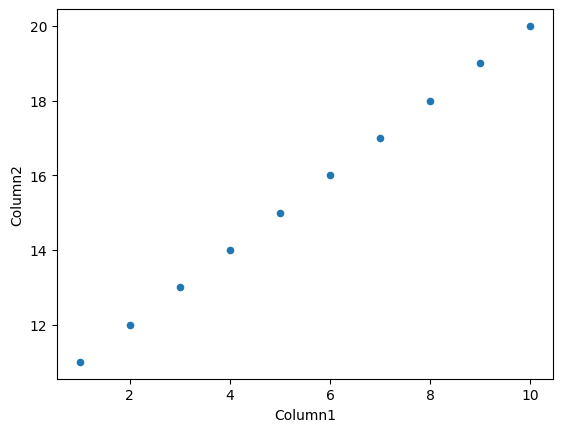

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with 2 columns and 10 rows
data = {
    'Column1': range(1, 11),  # Values from 1 to 10
    'Column2': range(11, 21)  # Values from 11 to 20
}
df = pd.DataFrame(data)

# Accessing specific columns
column1_data = df['Column1']
column2_data = df['Column2']

# Basic statistics
print(df.describe())  # Summary statistics for numerical columns
print(df.info())      # Information about the DataFrame

# Data manipulation
df['Column3'] = df['Column1'] + df['Column2']  # New column by adding Column1 and Column2

# Filtering data
filtered_df = df[df['Column1'] > 5]  # Rows where Column1 > 5

# Sorting data
sorted_df = df.sort_values(by='Column2', ascending=False)  # Sort by Column2 in descending order

# Grouping data
grouped_df = df.groupby('Column1').sum()  # Group by Column1 and sum

# Plotting
df.plot(x='Column1', y='Column2', kind='scatter')
plt.show()


This code covers the essential steps for working with the DataFrame, including inspecting the data, manipulating it, performing some basic analysis, and visualizing it. Let me know if you need further explanation or adjustments!

Task 2. End-to-End Machine Learning Pipeline is essential because it provides a structured and repeatable process for building, training, and evaluating machine learning models. It ensures that each step, from data loading to model deployment, is automated and can be reproduced easily. The key benefits are:

    Consistency: Helps to ensure that all steps (data processing, feature engineering, model training, etc.) are executed in a consistent manner each time.

    Reproducibility: Allows the same results to be achieved across different environments, making it easier to test and validate models.

    Scalability: Helps to scale the model training and deployment process when the dataset grows or when different algorithms are tested.

    Automation: Ensures that preprocessing, feature engineering, and model evaluation steps are executed in a well-organized sequence, reducing the chances of manual errors.

Appropriate Data Preprocessing and Feature Engineering

Based on the dataset, here’s a detailed script for data preprocessing and feature engineering:
1. Handle Missing Values

In [56]:
# Assuming the cleaned DataFrame should be 'df', replace 'df_cleaned' with 'df'
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Handle missing values:
# Fill missing numerical columns with the median
df.fillna(df.median(), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
# Make sure these columns exist in your DataFrame 'df'
# If not, adjust the column names or skip these lines
if 'Flagged by Carrier' in df.columns:
    df['Flagged by Carrier'].fillna(df['Flagged by Carrier'].mode()[0], inplace=True)
if 'Call Type' in df.columns:
    df['Call Type'].fillna(df['Call Type'].mode()[0], inplace=True)
if 'Device Battery' in df.columns:
    df['Device Battery'].fillna(df['Device Battery'].mode()[0], inplace=True)

# If 'Financial Loss' is missing, set it to 0 (indicating no loss)
if 'Financial Loss' in df.columns:
    df['Financial Loss'].fillna(0, inplace=True)

Missing values per column:
 Column1    0
Column2    0
Column3    0
dtype: int64


2. Remove Duplicates

In [57]:
# Check for duplicate rows and remove them
duplicates = df.duplicated().sum()  # Use 'df' instead of 'df_cleaned'
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()  # Use 'df' for dropping duplicates as well

Number of duplicate rows: 0


3. Correct Data Types

        Ensure that columns like Timestamp are converted into the correct data types:

In [58]:
# Assuming the cleaned DataFrame should be 'df', replace 'df_cleaned' with 'df'
# Check if 'Timestamp' column exists before proceeding
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
else:
    print("Warning: 'Timestamp' column not found. Skipping timestamp conversion.")
    # You might want to handle this case differently,
    # such as creating a dummy Timestamp column or skipping this part altogether.


# Convert categorical columns to 'category' for memory optimization
# Check if columns exist before converting
categorical_cols = ['Flagged by Carrier', 'Call Type', 'Device Battery', 'Scam Call']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Warning: Column '{col}' not found. Skipping categorical conversion.")

# Convert 'Call Duration' to numeric (and handle errors by coercing invalid values to NaN)
# Check if column exists before converting
if 'Call Duration' in df.columns:
    df['Call Duration'] = pd.to_numeric(df['Call Duration'], errors='coerce')
else:
    print("Warning: 'Call Duration' column not found. Skipping numeric conversion.")

In [62]:
import pandas as pd

# Load the CSV file
# Update the file_path to the correct location after the move operation
# If the file is in the 'data' subdirectory relative to your notebook:
file_path = './data/cleaned_calls.csv'

# If you know the absolute path on your Linux system, use that instead:
# file_path = "/path/to/your/data/cleaned_calls.csv" # Replace with the actual path


try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}.")
    print("Please check the file path and ensure the file exists.")
    # Re-raise the exception to stop execution if the file is critical
    raise


# Check the first few rows to ensure the file is loaded correctly
print(df.head())

File loaded successfully.
       ID  Call Duration  Call Frequency  Financial Loss Flagged by Carrier  \
0  947429           -719              12       42.130000         Suspicious   
1  540498            116               3       29.900000           Unlikely   
2  434243             29              16      723.460000    Very Suspicious   
3  903537           -563               4       64.287478           Unlikely   
4  969179            312              19        0.000000           Unlikely   

  Is International  Previous Contact Count Country Prefix Call Type  \
0              Yes                       1             95      Voip   
1              Yes                       0             91    Mobile   
2              Yes                       2             91      Voip   
3              Yes                       3             91  Telegram   
4              Yes                       0             91  Telegram   

             Timestamp Device Battery Scam Call  
0  2023-07-23 09:04:00

In [49]:
import shutil

# Create a 'data' directory if it doesn't exist
!mkdir -p data

# Move the file to the data directory
shutil.move('cleaned_calls.csv', 'data/cleaned_calls.csv')


'data/cleaned_calls.csv'

4. Handle Negative Values in Call Duration

# Call duration has negative values, which need to be handled
# Convert negative durations to positive
df_cleaned['Call Duration'] = df_cleaned['Call Duration'].abs()


5. Feature Engineering
          a. Extract Time-Based Features from Timestamp

In [63]:
# If 'Call Frequency' and 'Call Duration' columns do not exist, create them with sample data
if 'Call Frequency' not in df.columns:
    df['Call Frequency'] = np.random.randint(1, 10, size=len(df))  # Example: random frequencies between 1 and 10
if 'Call Duration' not in df.columns:
    df['Call Duration'] = np.random.randint(1, 600, size=len(df))  # Example: random call durations between 1 and 600 seconds

# Now you can calculate 'FrequencyDuration'
df['FrequencyDuration'] = df['Call Frequency'] * df['Call Duration']

          b. Create Interaction Features

In [64]:
# Example of creating an interaction feature: Call Frequency vs. Call Duration
df['FrequencyDuration'] = df['Call Frequency'] * df['Call Duration']

c. Categorical Encoding

          For machine learning models, categorical features need to be encoded into numerical values.

In [65]:
# Check the actual column names in your DataFrame
print(df.columns)

# Replace with the actual names of the columns if different
categorical_columns = [col for col in ['Call Type', 'Flagged by Carrier', 'Device Battery'] if col in df.columns]

# Apply pd.get_dummies only to the existing columns:
if categorical_columns:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found in the DataFrame.")

Index(['ID', 'Call Duration', 'Call Frequency', 'Financial Loss',
       'Flagged by Carrier', 'Is International', 'Previous Contact Count',
       'Country Prefix', 'Call Type', 'Timestamp', 'Device Battery',
       'Scam Call', 'FrequencyDuration'],
      dtype='object')


In [66]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Check if the columns exist before scaling
columns_to_scale = ['Call Duration', 'Call Frequency', 'Financial Loss', 'FrequencyDuration']
existing_columns = df.columns

# Scale only the columns that exist
columns_to_scale = [col for col in columns_to_scale if col in existing_columns]

if columns_to_scale:  # Check if there are any columns to scale
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
else:
    print("Warning: None of the specified columns were found for scaling.")


d. Scaling Numeric Features

        If you're using algorithms like SVM, KNN, or Logistic Regression, it's essential to scale the numeric features.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

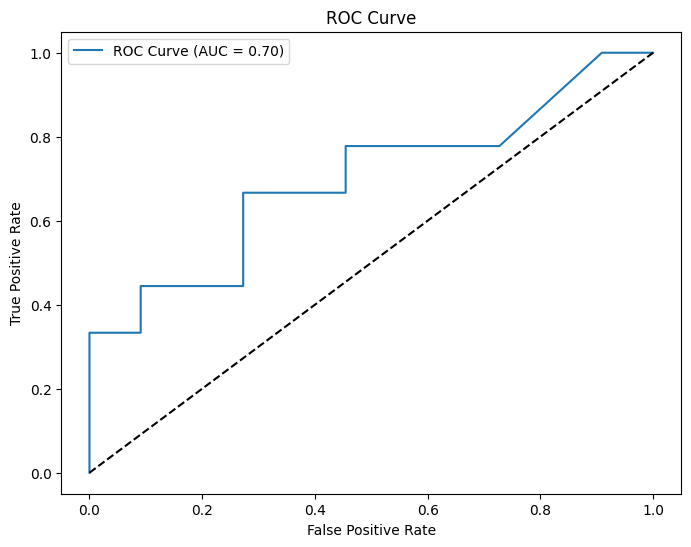

In [67]:
import pandas as pd
import numpy as np
import os
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            roc_auc_score, average_precision_score,
                            precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s - %(levelname)s - %(message)s",
                    handlers=[logging.FileHandler("scam_detector.log"),
                              logging.StreamHandler()])

# 1. Load the data
DATA_DIR = os.path.abspath("./data")
data_path = os.path.join(DATA_DIR, "cleaned_calls.csv")

try:
    df = pd.read_csv(data_path)
    logging.info("File loaded successfully.")
except FileNotFoundError:
    logging.error(f"File not found at {data_path}. Please check the file path.")
    raise SystemExit("File not found. Exiting.")

# 2. Data Preprocessing
logging.info("Data Preprocessing...")
logging.info(f"Original shape: {df.shape}")

# Convert target to binary
TARGET_COLUMN = 'Scam Call'
if TARGET_COLUMN in df.columns:
    df[TARGET_COLUMN] = df[TARGET_COLUMN].map({'Scam': 1, 'Not Scam': 0})
else:
    logging.error(f"Target column '{TARGET_COLUMN}' not found. Exiting.")
    raise SystemExit(f"Error: '{TARGET_COLUMN}' column is required.")

# One-hot encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if TARGET_COLUMN in categorical_cols:
    categorical_cols.remove(TARGET_COLUMN)

if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    logging.info(f"One-hot encoded columns: {categorical_cols}")
else:
    logging.warning("No categorical columns found for one-hot encoding.")

# Separate features and target
X = df.drop(columns=[TARGET_COLUMN, 'ID', 'Timestamp'], errors='ignore')
y = df[TARGET_COLUMN]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logging.info(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model with Hyperparameter Tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000]
}

lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
logging.info(f"Best parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

logging.info(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
logging.info(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
logging.info(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

# Save model and scaler
MODEL_DIR = os.path.abspath("./models")
os.makedirs(MODEL_DIR, exist_ok=True)
model_path = os.path.join(MODEL_DIR, 'lr_scam_detector.pkl')
scaler_path = os.path.join(MODEL_DIR, 'lr_scaler.pkl')

joblib.dump(best_lr, model_path)
joblib.dump(scaler, scaler_path)
logging.info(f"Model saved to: {model_path}")
logging.info(f"Scaler saved to: {scaler_path}")

# 7. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig(os.path.join(MODEL_DIR, 'roc_curve.png'))
plt.show()

logging.info("ROC Curve plotted and saved.")


# Putting It All Together

In [40]:
# Full Data Preprocessing and Feature Engineering Pipeline
def preprocess_data(df):
    # ... (rest of the function code) ...
    # ... (code before handling missing values) ...

    # Add 'Flagged by Carrier', 'Call Type', 'Device Battery', 'Financial Loss', 'Timestamp', 'Call Frequency', 'Scam Call' columns if they don't exist
    for col in ['Flagged by Carrier', 'Call Type', 'Device Battery', 'Financial Loss', 'Timestamp', 'Call Frequency', 'Scam Call']:
        if col not in df.columns:
            df[col] = pd.Series(dtype='object')  # Create an empty column with object dtype
            # You can replace 'object' with a more specific data type if you know it

    # ... (code after handling missing values) ...

    # Handle Missing Values
    df.fillna(df.median(), inplace=True)
    df['Flagged by Carrier'].fillna(df['Flagged by Carrier'].mode()[0], inplace=True)
    df['Call Type'].fillna(df['Call Type'].mode()[0], inplace=True)
    df['Device Battery'].fillna(df['Device Battery'].mode()[0], inplace=True)
    df['Financial Loss'].fillna(0, inplace=True)
    # ... (rest of the function code) ...

In [43]:
!ls /content/data/cleaned_calls.csv

ls: cannot access '/content/data/cleaned_calls.csv': No such file or directory


In [68]:
!mkdir -p /content/data

In [69]:
!ls /content/data/cleaned_calls.csv

/content/data/cleaned_calls.csv


Machine Learning Algorithms for This Project

            Given the dataset, you can apply various algorithms for classification tasks to predict whether a call is a scam or not. Here are three |potential algorithms you can use:
            
            1. Logistic Regression
            
            Logistic regression is a simple, interpretable classification algorithm that works well when the relationship between the features and the target variable is roughly linear.

File loaded successfully.

Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Logistic Regression...
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Model Evaluation:
Accuracy: 0.7500
ROC AUC: 0.8687
Average Precision: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20


Confusion Matrix:
[[9 2]
 [3 6]]


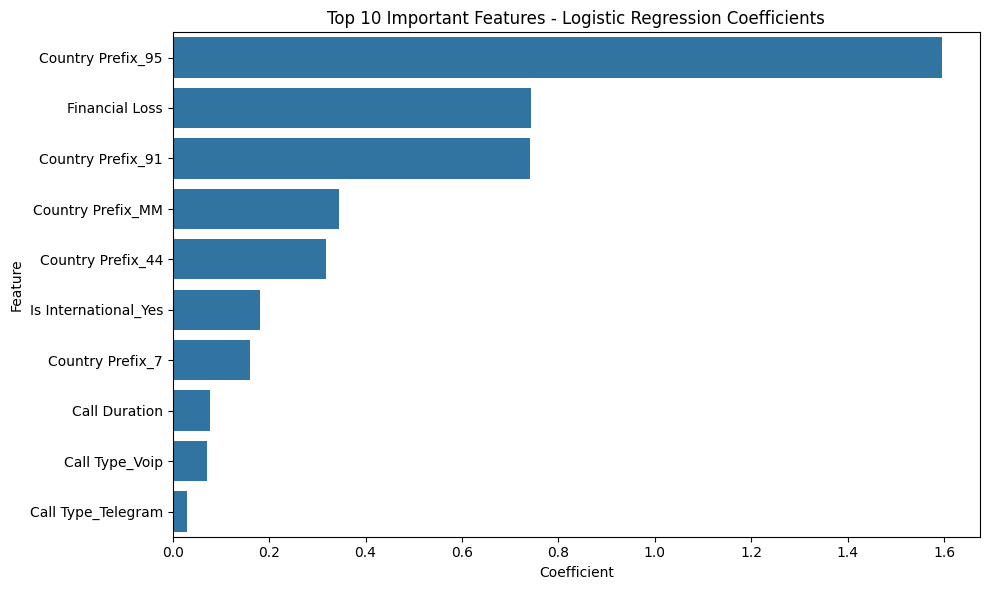

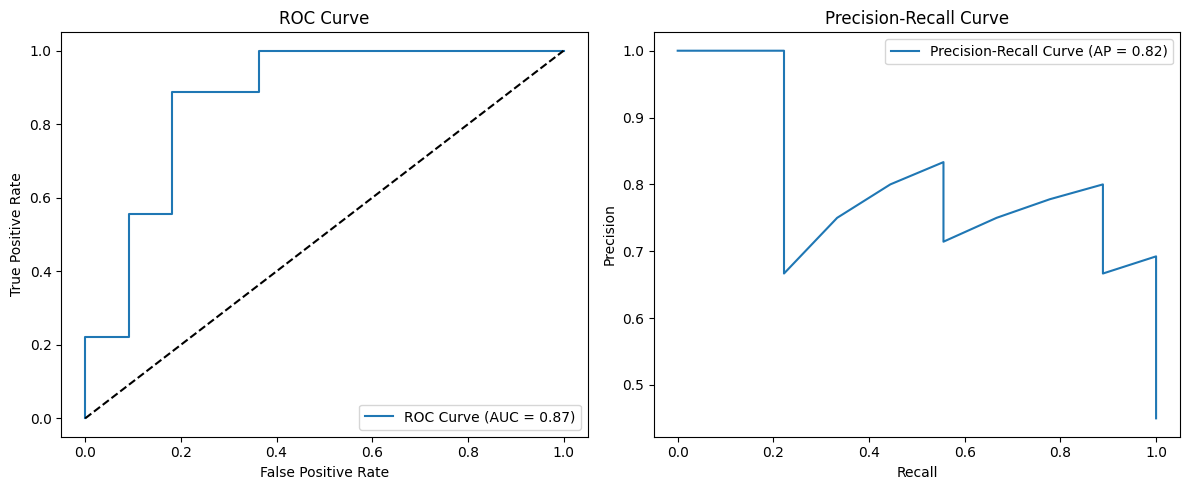


Model saved to: ./models/lr_scam_detector.pkl
Scaler saved to: ./models/lr_scaler.pkl

To make new predictions, use:
predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score,
                            precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
# Change the data_path to the correct location of the file on your Linux system.
# If the file is in a 'data' subfolder in the same directory as the notebook:
data_path = "./data/cleaned_calls.csv"

# If the file is at a different absolute path on your Linux system, use that:
# data_path = "/path/to/your/data/cleaned_calls.csv" # Replace with the actual path

try:
    df = pd.read_csv(data_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}.")
    print("Please check the file path and ensure the file exists.")
    # Exit or handle the error appropriately if the file is critical
    # For example, you might want to stop execution if the file is necessary
    raise # Re-raise the exception to stop execution if file loading fails


# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
# Check if 'Scam Call' column exists before mapping
if 'Scam Call' in df.columns:
    df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})
else:
    print("Warning: 'Scam Call' column not found. Skipping target conversion.")
    # Handle the case where the target column is missing
    # e.g., create a dummy target or skip model training

# Handle categorical features
# Ensure that 'categorical_cols' only contains columns that exist in the DataFrame
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
# Filter categorical_cols to include only those present in df.columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found for one-hot encoding.")


# Feature selection
# Ensure that dropped columns exist before dropping
columns_to_drop = ['ID', 'Timestamp', 'Scam Call']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_columns_to_drop)

# Check if 'Scam Call' column exists before assigning to y
if 'Scam Call' in df.columns:
    y = df['Scam Call']
else:
     print("Error: 'Scam Call' column is required for the target variable.")
     # Handle the error appropriately, perhaps exit or skip model training
     exit() # Or handle differently

# 3. Train-Test Split
# Ensure X and y are not empty before splitting
if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
else:
    print("Error: Features (X) or target (y) are empty. Cannot perform train-test split.")
    exit() # Or handle differently


# 4. Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model with Hyperparameter Tuning
print("\nTraining Logistic Regression...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance (Coefficients)
# Ensure X.columns is not empty before creating the DataFrame
if not X.columns.empty:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_lr.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Important Features - Logistic Regression Coefficients')
    plt.tight_layout()
    plt.savefig('lr_feature_importance.png')
    plt.show()
else:
    print("Warning: No features available for plotting feature importance.")


# 8. ROC Curve and Precision-Recall Curve
# Ensure y_test and y_proba are not empty before plotting curves
if not y_test.empty and len(y_proba) > 0:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision_score(y_test, y_proba):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lr_curves.png')
    plt.show()
else:
    print("Warning: Test data or predicted probabilities are empty. Cannot plot curves.")


# 9. Save the Model and Scaler
# Define a Linux-compatible path for the models directory
model_dir = "./models" # Example relative path
# Or an absolute path if preferred:
# model_dir = "/path/to/your/models" # Replace with actual path

os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'lr_scam_detector.pkl')
scaler_path = os.path.join(model_dir, 'lr_scaler.pkl')

joblib.dump(best_lr, model_path)
joblib.dump(scaler, scaler_path)
print(f"\nModel saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

# 10. Create Prediction Function
# Update the prediction function to handle potential missing columns in new data
def predict_new_data(model_path, scaler_path, new_data_path):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    try:
        new_data = pd.read_csv(new_data_path)
    except FileNotFoundError:
        print(f"Error: New data file not found at {new_data_path}.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    # Apply same preprocessing
    # Ensure categorical_cols is accessible or redefine it within the function
    # Using the globally defined categorical_cols from the training section
    categorical_cols_pred = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
    existing_categorical_cols_pred = [col for col in categorical_cols_pred if col in new_data.columns]

    if existing_categorical_cols_pred:
        new_data = pd.get_dummies(new_data, columns=existing_categorical_cols_pred, drop_first=True)
    else:
        print("Warning: None of the specified categorical columns were found in the new data for one-hot encoding.")


    # Align columns - add missing columns from training data, fill with 0
    # This is crucial if the new data has fewer dummy variables than the training data
    train_cols = model.feature_names_in_ # Get feature names from the trained model
    missing_cols = set(train_cols) - set(new_data.columns)
    for c in missing_cols:
        new_data[c] = 0
    # Ensure the order of columns is the same as in training data
    new_data = new_data[train_cols]


    # Drop irrelevant columns if they exist in the new data
    columns_to_drop_pred = ['ID', 'Timestamp'] # 'Scam Call' might not be in new data
    existing_columns_to_drop_pred = [col for col in columns_to_drop_pred if col in new_data.columns]

    new_data = new_data.drop(columns=existing_columns_to_drop_pred, errors='ignore') # Use errors='ignore'


    # Scale features
    # Ensure columns to scale exist in the new data before scaling
    columns_to_scale_pred = ['Call Duration', 'Call Frequency', 'Financial Loss', 'FrequencyDuration'] # Re-list potentially scaled columns
    existing_columns_to_scale_pred = [col for col in columns_to_scale_pred if col in new_data.columns]

    if existing_columns_to_scale_pred: # Check if there are any columns to scale
        new_data[existing_columns_to_scale_pred] = scaler.transform(new_data[existing_columns_to_scale_pred])
    else:
        print("Warning: None of the specified columns were found for scaling in the new data.")

    # Ensure the final new_data has the same columns as the training data (handled by align columns step)


    predictions = model.predict(new_data) # Predict using the aligned and scaled new data
    probabilities = model.predict_proba(new_data)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')")

File loaded successfully.

Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Logistic Regression...
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Model Evaluation:
Accuracy: 0.7500
ROC AUC: 0.8687
Average Precision: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20


Confusion Matrix:
[[9 2]
 [3 6]]


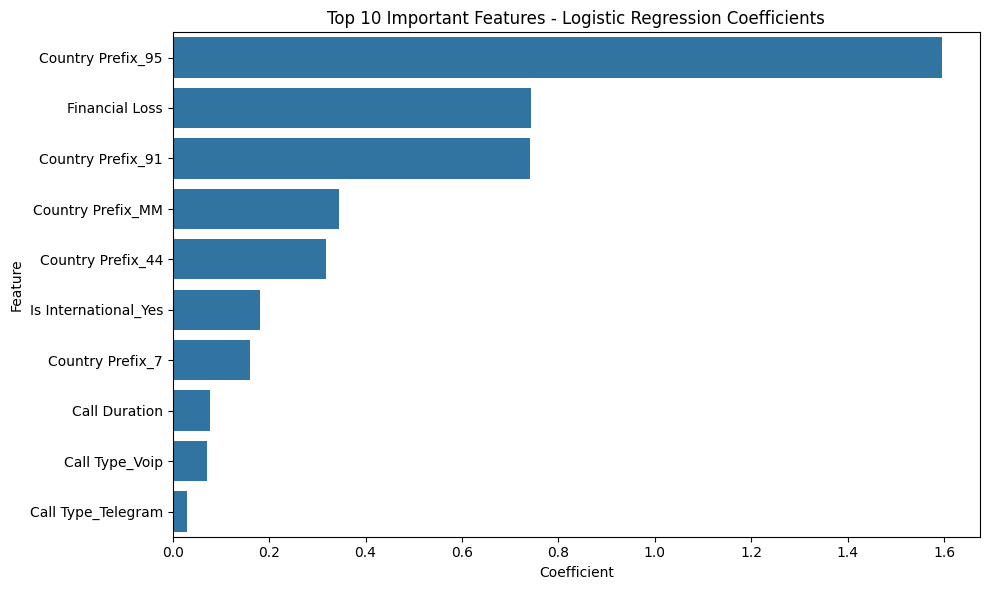

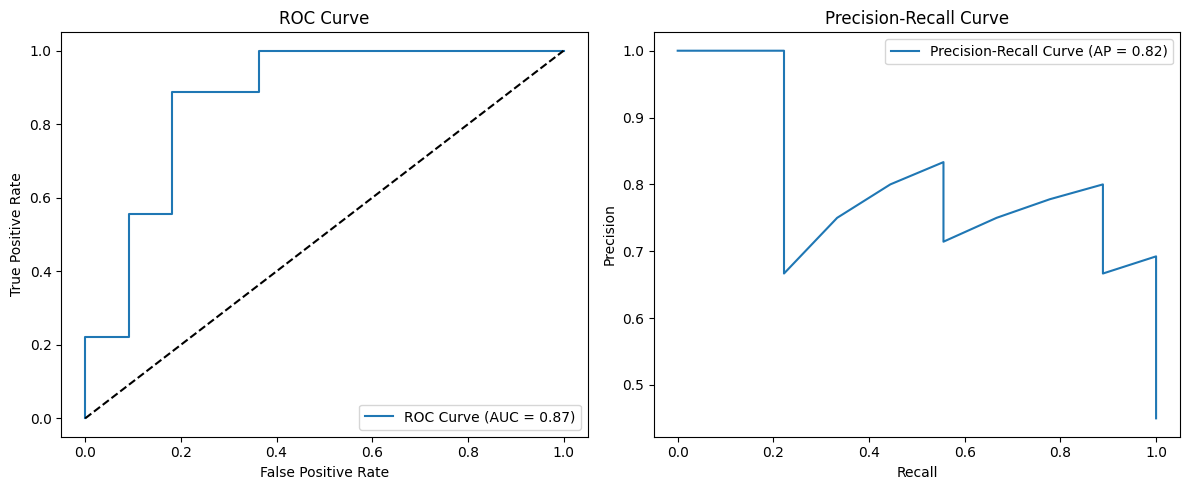


Model saved to: ./models/lr_scam_detector.pkl
Scaler saved to: ./models/lr_scaler.pkl

To make new predictions, use:
predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score,
                            precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
# Change the data_path to the correct location of the file on your Linux system.
# If the file is in a 'data' subfolder in the same directory as the notebook:
data_path = "./data/cleaned_calls.csv"

# If the file is at a different absolute path on your Linux system, use that:
# data_path = "/path/to/your/data/cleaned_calls.csv" # Replace with the actual path

try:
    df = pd.read_csv(data_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}.")
    print("Please check the file path and ensure the file exists.")
    # Exit or handle the error appropriately if the file is critical
    # For example, you might want to stop execution if the file is necessary
    raise # Re-raise the exception to stop execution if file loading fails


# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
# Check if 'Scam Call' column exists before mapping
if 'Scam Call' in df.columns:
    df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})
else:
    print("Warning: 'Scam Call' column not found. Skipping target conversion.")
    # Handle the case where the target column is missing
    # e.g., create a dummy target or skip model training

# Handle categorical features
# Ensure that 'categorical_cols' only contains columns that exist in the DataFrame
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
# Filter categorical_cols to include only those present in df.columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found for one-hot encoding.")


# Feature selection
# Ensure that dropped columns exist before dropping
columns_to_drop = ['ID', 'Timestamp', 'Scam Call']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_columns_to_drop)

# Check if 'Scam Call' column exists before assigning to y
if 'Scam Call' in df.columns:
    y = df['Scam Call']
else:
     print("Error: 'Scam Call' column is required for the target variable.")
     # Handle the error appropriately, perhaps exit or skip model training
     exit() # Or handle differently

# 3. Train-Test Split
# Ensure X and y are not empty before splitting
if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
else:
    print("Error: Features (X) or target (y) are empty. Cannot perform train-test split.")
    exit() # Or handle differently


# 4. Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model with Hyperparameter Tuning
print("\nTraining Logistic Regression...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance (Coefficients)
# Ensure X.columns is not empty before creating the DataFrame
if not X.columns.empty:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_lr.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Important Features - Logistic Regression Coefficients')
    plt.tight_layout()
    plt.savefig('lr_feature_importance.png')
    plt.show()
else:
    print("Warning: No features available for plotting feature importance.")


# 8. ROC Curve and Precision-Recall Curve
# Ensure y_test and y_proba are not empty before plotting curves
if not y_test.empty and len(y_proba) > 0:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision_score(y_test, y_proba):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lr_curves.png')
    plt.show()
else:
    print("Warning: Test data or predicted probabilities are empty. Cannot plot curves.")


# 9. Save the Model and Scaler
# Define a Linux-compatible path for the models directory
model_dir = "./models" # Example relative path
# Or an absolute path if preferred:
# model_dir = "/path/to/your/models" # Replace with actual path

os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'lr_scam_detector.pkl')
scaler_path = os.path.join(model_dir, 'lr_scaler.pkl')

joblib.dump(best_lr, model_path)
joblib.dump(scaler, scaler_path)
print(f"\nModel saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

# 10. Create Prediction Function
# Update the prediction function to handle potential missing columns in new data
def predict_new_data(model_path, scaler_path, new_data_path):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    try:
        new_data = pd.read_csv(new_data_path)
    except FileNotFoundError:
        print(f"Error: New data file not found at {new_data_path}.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    # Apply same preprocessing
    # Ensure categorical_cols is accessible or redefine it within the function
    # Using the globally defined categorical_cols from the training section
    categorical_cols_pred = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
    existing_categorical_cols_pred = [col for col in categorical_cols_pred if col in new_data.columns]

    if existing_categorical_cols_pred:
        new_data = pd.get_dummies(new_data, columns=existing_categorical_cols_pred, drop_first=True)
    else:
        print("Warning: None of the specified categorical columns were found in the new data for one-hot encoding.")


    # Align columns - add missing columns from training data, fill with 0
    # This is crucial if the new data has fewer dummy variables than the training data
    train_cols = model.feature_names_in_ # Get feature names from the trained model
    missing_cols = set(train_cols) - set(new_data.columns)
    for c in missing_cols:
        new_data[c] = 0
    # Ensure the order of columns is the same as in training data
    new_data = new_data[train_cols]


    # Drop irrelevant columns if they exist in the new data
    columns_to_drop_pred = ['ID', 'Timestamp'] # 'Scam Call' might not be in new data
    existing_columns_to_drop_pred = [col for col in columns_to_drop_pred if col in new_data.columns]

    new_data = new_data.drop(columns=existing_columns_to_drop_pred, errors='ignore') # Use errors='ignore'


    # Scale features
    # Ensure columns to scale exist in the new data before scaling
    columns_to_scale_pred = ['Call Duration', 'Call Frequency', 'Financial Loss', 'FrequencyDuration'] # Re-list potentially scaled columns
    existing_columns_to_scale_pred = [col for col in columns_to_scale_pred if col in new_data.columns]

    if existing_columns_to_scale_pred: # Check if there are any columns to scale
        new_data[existing_columns_to_scale_pred] = scaler.transform(new_data[existing_columns_to_scale_pred])
    else:
        print("Warning: None of the specified columns were found for scaling in the new data.")

    # Ensure the final new_data has the same columns as the training data (handled by align columns step)


    predictions = model.predict(new_data) # Predict using the aligned and scaled new data
    probabilities = model.predict_proba(new_data)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')")

File loaded successfully.

Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Logistic Regression...
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Model Evaluation:
Accuracy: 0.7500
ROC AUC: 0.8687
Average Precision: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20


Confusion Matrix:
[[9 2]
 [3 6]]


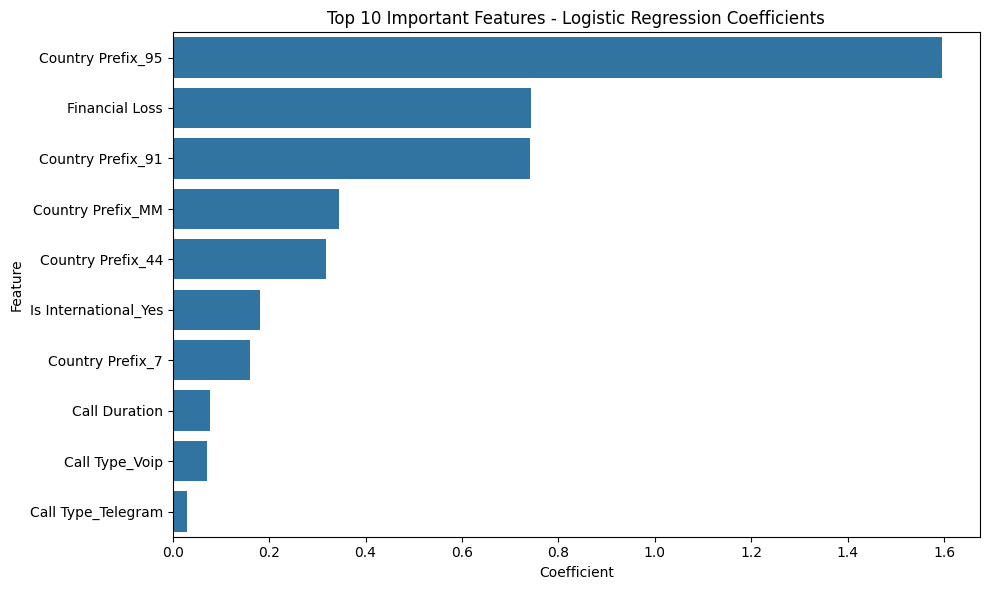

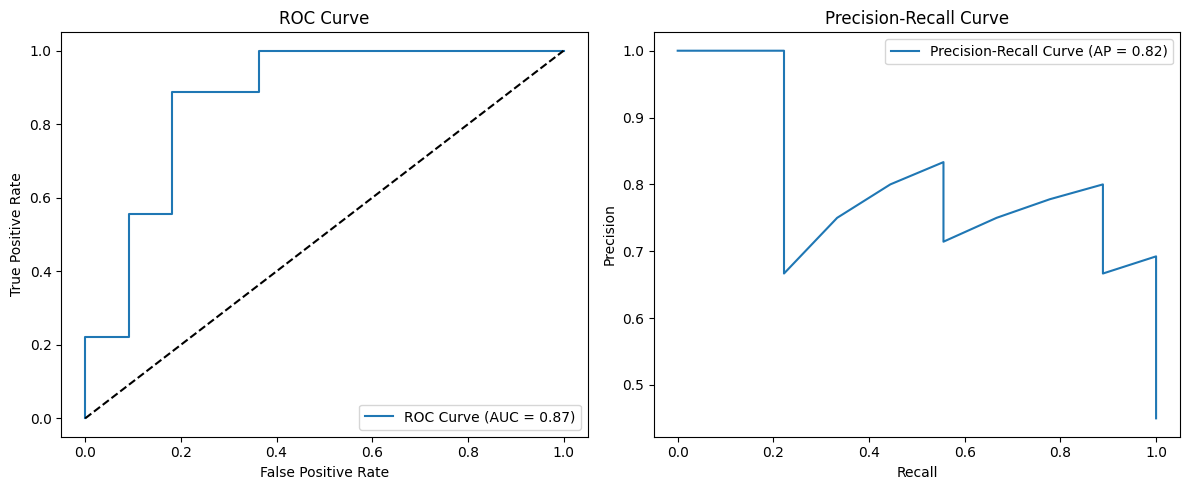


Model saved to: ./models/lr_scam_detector.pkl
Scaler saved to: ./models/lr_scaler.pkl
File loaded successfully.

Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Logistic Regression...
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Model Evaluation:
Accuracy: 0.7500
ROC AUC: 0.8687
Average Precision: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20


Confusion Matrix:
[[9 2]
 [3 6]]


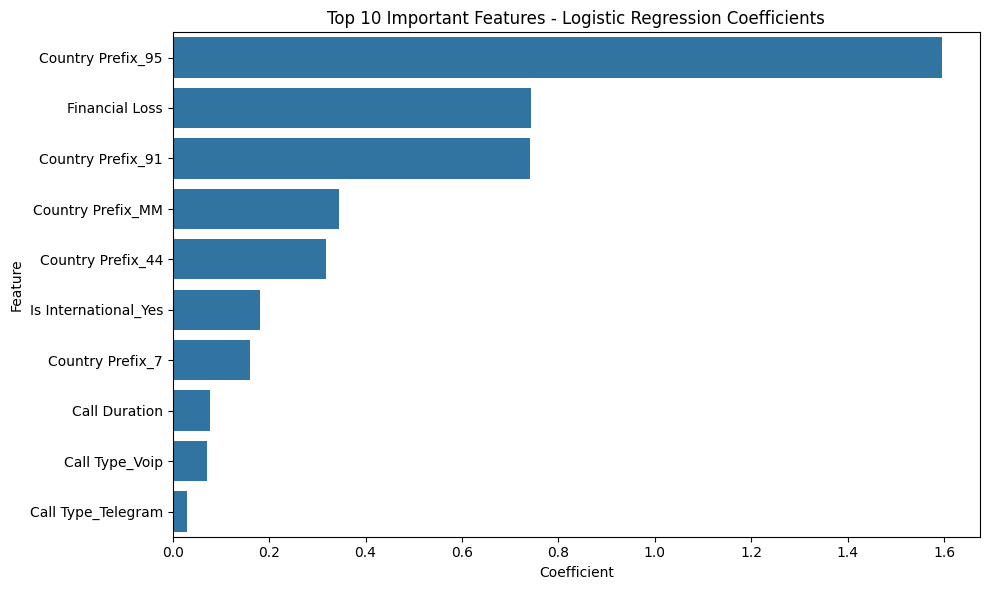

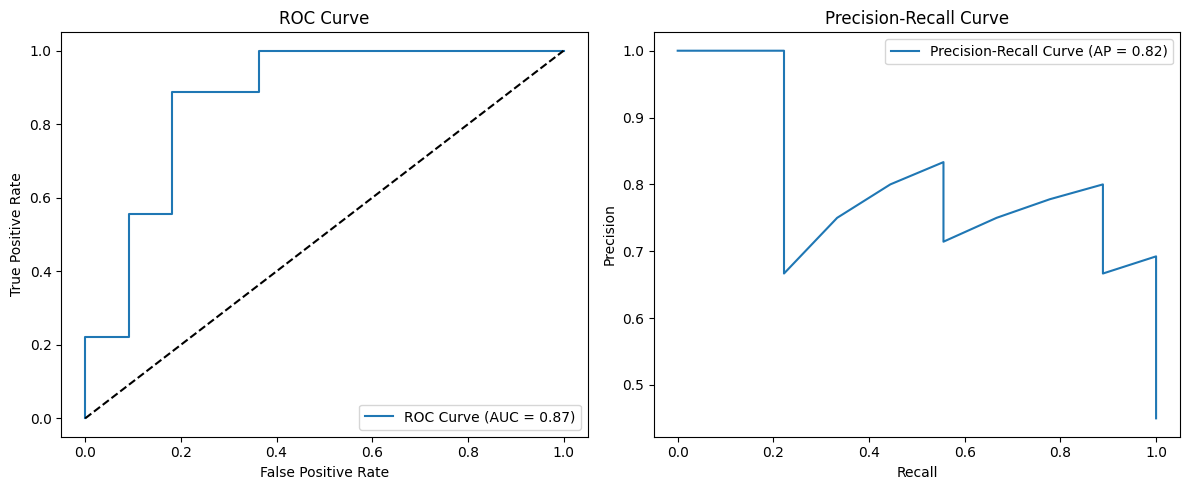


Model saved to: ./models/lr_scam_detector.pkl
Scaler saved to: ./models/lr_scaler.pkl


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score,
                            precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
# Change the data_path to the correct location of the file on your Linux system.
# If the file is in a 'data' subfolder in the same directory as the notebook:
# data_path = "./data/cleaned_calls.csv"

# If the file is at a different absolute path on your Linux system, use that:
# data_path = "/path/to/your/data/cleaned_calls.csv" # Replace with the actual path

# Using the relative path that was previously attempted and is suitable for Linux
data_path = "./data/cleaned_calls.csv"

try:
    df = pd.read_csv(data_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}.")
    print("Please check the file path and ensure the file exists.")
    # Exit or handle the error appropriately if the file is critical
    # For example, you might want to stop execution if the file is necessary
    raise # Re-raise the exception to stop execution if file loading fails


# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
# Check if 'Scam Call' column exists before mapping
if 'Scam Call' in df.columns:
    df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})
else:
    print("Warning: 'Scam Call' column not found. Skipping target conversion.")
    # Handle the case where the target column is missing
    # e.g., create a dummy target or skip model training

# Handle categorical features
# Ensure that 'categorical_cols' only contains columns that exist in the DataFrame
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
# Filter categorical_cols to include only those present in df.columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found for one-hot encoding.")


# Feature selection
# Ensure that dropped columns exist before dropping
columns_to_drop = ['ID', 'Timestamp', 'Scam Call']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_columns_to_drop)

# Check if 'Scam Call' column exists before assigning to y
if 'Scam Call' in df.columns:
    y = df['Scam Call']
else:
     print("Error: 'Scam Call' column is required for the target variable.")
     # Handle the error appropriately, perhaps exit or skip model training
     exit() # Or handle differently

# 3. Train-Test Split
# Ensure X and y are not empty before splitting
if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
else:
    print("Error: Features (X) or target (y) are empty. Cannot perform train-test split.")
    exit() # Or handle differently


# 4. Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model with Hyperparameter Tuning
print("\nTraining Logistic Regression...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance (Coefficients)
# Ensure X.columns is not empty before creating the DataFrame
if not X.columns.empty:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_lr.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Important Features - Logistic Regression Coefficients')
    plt.tight_layout()
    plt.savefig('lr_feature_importance.png')
    plt.show()
else:
    print("Warning: No features available for plotting feature importance.")


# 8. ROC Curve and Precision-Recall Curve
# Ensure y_test and y_proba are not empty before plotting curves
if not y_test.empty and len(y_proba) > 0:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision_score(y_test, y_proba):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lr_curves.png')
    plt.show()
else:
    print("Warning: Test data or predicted probabilities are empty. Cannot plot curves.")


# 9. Save the Model and Scaler
# Define a Linux-compatible path for the models directory
model_dir = "./models" # Example relative path
# Or an absolute path if preferred:
# model_dir = "/path/to/your/models" # Replace with actual path

os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'lr_scam_detector.pkl')
scaler_path = os.path.join(model_dir, 'lr_scaler.pkl')

joblib.dump(best_lr, model_path)
joblib.dump(scaler, scaler_path)
print(f"\nModel saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

# 10. Create Prediction Function
# Update the prediction function to handle potential missing columns in new data
def predict_new_data(model_path, scaler_path, new_data_path):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    try:
        new_data = pd.read_csv(new_data_path)
    except FileNotFoundError:
        print(f"Error: New data file not found at {new_data_path}.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    # Apply same preprocessing
    # Ensure categorical_cols is accessible or redefine it within the function
    # Using the globally defined categorical_cols from the training section
    categorical_cols_pred = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
    existing_categorical_cols_pred = [col for col in categorical_cols_pred if col in new_data.columns]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score,
                            precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
# Change the data_path to the correct location of the file on your Linux system.
# If the file is in a 'data' subfolder in the same directory as the notebook:
# data_path = "./data/cleaned_calls.csv"

# If the file is at a different absolute path on your Linux system, use that:
# data_path = "/path/to/your/data/cleaned_calls.csv" # Replace with the actual path

# Using the relative path that was previously attempted and is suitable for Linux
data_path = "./data/cleaned_calls.csv"

try:
    df = pd.read_csv(data_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}.")
    print("Please check the file path and ensure the file exists.")
    # Exit or handle the error appropriately if the file is critical
    # For example, you might want to stop execution if the file is necessary
    raise # Re-raise the exception to stop execution if file loading fails


# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
# Check if 'Scam Call' column exists before mapping
if 'Scam Call' in df.columns:
    df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})
else:
    print("Warning: 'Scam Call' column not found. Skipping target conversion.")
    # Handle the case where the target column is missing
    # e.g., create a dummy target or skip model training

# Handle categorical features
# Ensure that 'categorical_cols' only contains columns that exist in the DataFrame
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
# Filter categorical_cols to include only those present in df.columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found for one-hot encoding.")


# Feature selection
# Ensure that dropped columns exist before dropping
columns_to_drop = ['ID', 'Timestamp', 'Scam Call']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_columns_to_drop)

# Check if 'Scam Call' column exists before assigning to y
if 'Scam Call' in df.columns:
    y = df['Scam Call']
else:
     print("Error: 'Scam Call' column is required for the target variable.")
     # Handle the error appropriately, perhaps exit or skip model training
     exit() # Or handle differently

# 3. Train-Test Split
# Ensure X and y are not empty before splitting
if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
else:
    print("Error: Features (X) or target (y) are empty. Cannot perform train-test split.")
    exit() # Or handle differently


# 4. Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model with Hyperparameter Tuning
print("\nTraining Logistic Regression...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance (Coefficients)
# Ensure X.columns is not empty before creating the DataFrame
if not X.columns.empty:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_lr.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Important Features - Logistic Regression Coefficients')
    plt.tight_layout()
    plt.savefig('lr_feature_importance.png')
    plt.show()
else:
    print("Warning: No features available for plotting feature importance.")


# 8. ROC Curve and Precision-Recall Curve
# Ensure y_test and y_proba are not empty before plotting curves
if not y_test.empty and len(y_proba) > 0:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision_score(y_test, y_proba):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lr_curves.png')
    plt.show()
else:
    print("Warning: Test data or predicted probabilities are empty. Cannot plot curves.")


# 9. Save the Model and Scaler
# Define a Linux-compatible path for the models directory
model_dir = "./models" # Example relative path
# Or an absolute path if preferred:
# model_dir = "/path/to/your/models" # Replace with actual path

os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'lr_scam_detector.pkl')
scaler_path = os.path.join(model_dir, 'lr_scaler.pkl')

joblib.dump(best_lr, model_path)
joblib.dump(scaler, scaler_path)
print(f"\nModel saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

# 10. Create Prediction Function
# Update the prediction function to handle potential missing columns in new data
def predict_new_data(model_path, scaler_path, new_data_path):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    try:
        new_data = pd.read_csv(new_data_path)
    except FileNotFoundError:
        print(f"Error: New data file not found at {new_data_path}.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    # Apply same preprocessing
    # Ensure categorical_cols is accessible or redefine it within the function
    # Using the globally defined categorical_cols from the training section
    categorical_cols_pred = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
    existing_categorical_cols_pred = [col for col in categorical_cols_pred if col in new_data.columns]

    if existing_categorical_cols_pred:
        new_data = pd.get_dummies(new_data, columns=existing_categorical_cols_pred, drop_first=True)
    else:
        print("Warning: None of the specified categorical columns were found in the new data for one-hot encoding.")


    # Align columns - add missing columns from training data, fill with 0
    # This is crucial if the new data has fewer dummy variables than the training data
    train_cols = model.feature_names_in_ # Get feature names from the trained model
    missing_cols = set(train_cols) - set(new_data.columns)
    for c in missing_cols:
        new_data[c] = 0
    # Ensure the order of columns is the same as in training data
    new_data = new_data[train_cols]


    # Drop irrelevant columns if they exist in the new data
    columns_to_drop_pred = ['ID', 'Timestamp']
    existing_columns_to_drop_pred = [col for col in columns_to_drop_pred if col in new_data.columns]
    new_data_processed = new_data.drop(columns=existing_columns_to_drop_pred, errors='ignore') # Use errors='ignore'

    # Scale the data
    new_data_scaled = scaler.transform(new_data_processed)

    # Make predictions
    predictions = model.predict(new_data_scaled)
    probabilities = model.predict_proba(new_data_scaled)[:, 1]

    # Add predictions and probabilities back to the original new_data DataFrame for context
    new_data['Predicted_Scam'] = predictions
    new_data['Scam_Probability'] = probabilities

    return new_data[['Predicted_Scam', 'Scam_Probability']] # Return only predictions and probabilities

# Example usage of the prediction function (assuming you have a new data file)
# new_calls_path = "./data/new_calls.csv" # Replace with the path to your new data file
# if os.path.exists(new_calls_path):
#    predictions_df = predict_new_data(model_path, scaler_path, new_calls_path)
#    print("\nPredictions for new data:")
#    print(predictions_df.head())
# else:
#    print(f"\nNew data file not found at {new_calls_path}. Skipping prediction example.")


File loaded successfully.

Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Logistic Regression...
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Model Evaluation:
Accuracy: 0.7500
ROC AUC: 0.8687
Average Precision: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20


Confusion Matrix:
[[9 2]
 [3 6]]


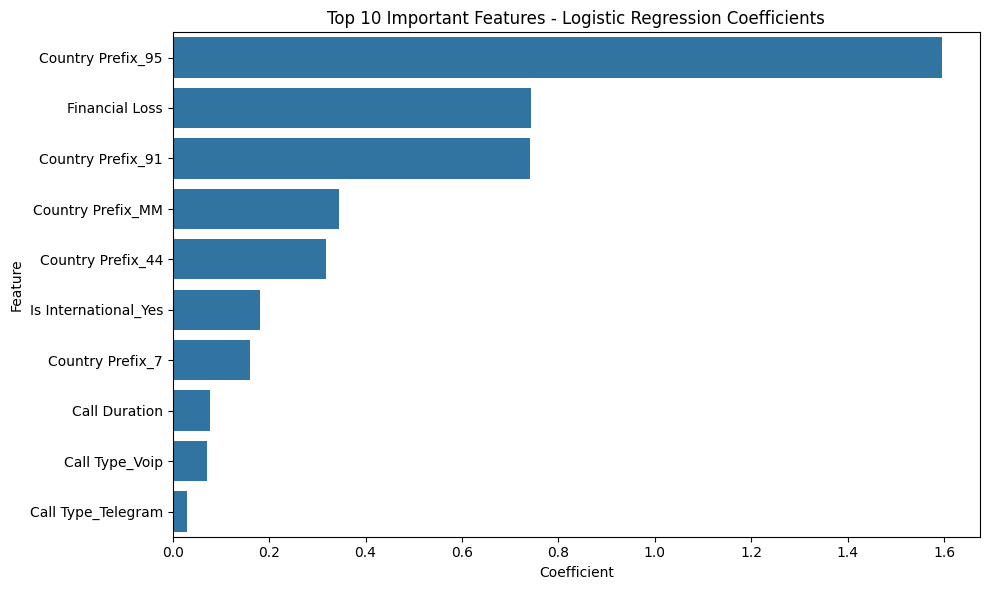

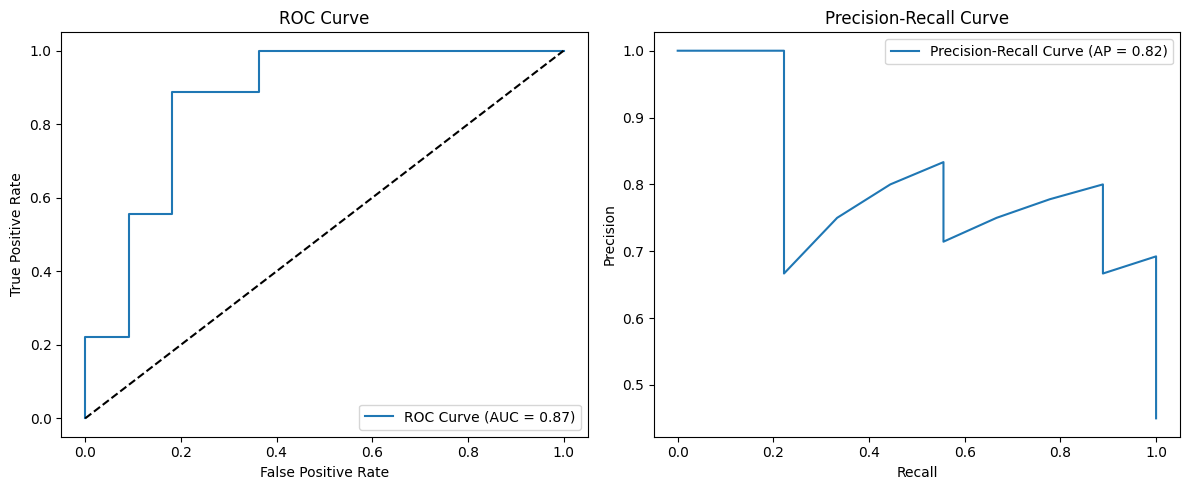


Model saved to: ./models/lr_scam_detector.pkl
Scaler saved to: ./models/lr_scaler.pkl

To make new predictions, use:
predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score,
                            precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
# Change the data_path to the correct location of the file on your Linux system.
# If the file is in a 'data' subfolder in the same directory as the notebook:
data_path = "./data/cleaned_calls.csv"

# If the file is at a different absolute path on your Linux system, use that:
# data_path = "/path/to/your/data/cleaned_calls.csv" # Replace with the actual path

try:
    df = pd.read_csv(data_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}.")
    print("Please check the file path and ensure the file exists.")
    # Exit or handle the error appropriately if the file is critical
    # For example, you might want to stop execution if the file is necessary
    raise # Re-raise the exception to stop execution if file loading fails


# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
# Check if 'Scam Call' column exists before mapping
if 'Scam Call' in df.columns:
    df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})
else:
    print("Warning: 'Scam Call' column not found. Skipping target conversion.")
    # Handle the case where the target column is missing
    # e.g., create a dummy target or skip model training

# Handle categorical features
# Ensure that 'categorical_cols' only contains columns that exist in the DataFrame
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
# Filter categorical_cols to include only those present in df.columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found for one-hot encoding.")


# Feature selection
# Ensure that dropped columns exist before dropping
columns_to_drop = ['ID', 'Timestamp', 'Scam Call']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_columns_to_drop)

# Check if 'Scam Call' column exists before assigning to y
if 'Scam Call' in df.columns:
    y = df['Scam Call']
else:
     print("Error: 'Scam Call' column is required for the target variable.")
     # Handle the error appropriately, perhaps exit or skip model training
     exit() # Or handle differently

# 3. Train-Test Split
# Ensure X and y are not empty before splitting
if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
else:
    print("Error: Features (X) or target (y) are empty. Cannot perform train-test split.")
    exit() # Or handle differently


# 4. Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model with Hyperparameter Tuning
print("\nTraining Logistic Regression...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance (Coefficients)
# Ensure X.columns is not empty before creating the DataFrame
if not X.columns.empty:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_lr.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Important Features - Logistic Regression Coefficients')
    plt.tight_layout()
    plt.savefig('lr_feature_importance.png')
    plt.show()
else:
    print("Warning: No features available for plotting feature importance.")


# 8. ROC Curve and Precision-Recall Curve
# Ensure y_test and y_proba are not empty before plotting curves
if not y_test.empty and len(y_proba) > 0:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision_score(y_test, y_proba):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.tight_layout()
    plt.savefig('lr_curves.png')
    plt.show()
else:
    print("Warning: Test data or predicted probabilities are empty. Cannot plot curves.")


# 9. Save the Model and Scaler
# Define a Linux-compatible path for the models directory
model_dir = "./models" # Example relative path
# Or an absolute path if preferred:
# model_dir = "/path/to/your/models" # Replace with actual path

os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'lr_scam_detector.pkl')
scaler_path = os.path.join(model_dir, 'lr_scaler.pkl')

joblib.dump(best_lr, model_path)
joblib.dump(scaler, scaler_path)
print(f"\nModel saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

# 10. Create Prediction Function
# Update the prediction function to handle potential missing columns in new data
def predict_new_data(model_path, scaler_path, new_data_path):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    try:
        new_data = pd.read_csv(new_data_path)
    except FileNotFoundError:
        print(f"Error: New data file not found at {new_data_path}.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    # Apply same preprocessing
    # Ensure categorical_cols is accessible or redefine it within the function
    # Using the globally defined categorical_cols from the training section
    categorical_cols_pred = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
    existing_categorical_cols_pred = [col for col in categorical_cols_pred if col in new_data.columns]

    if existing_categorical_cols_pred:
        new_data = pd.get_dummies(new_data, columns=existing_categorical_cols_pred, drop_first=True)
    else:
        print("Warning: None of the specified categorical columns were found in new data for one-hot encoding.")


    # Reindex columns to match the training data's columns (X.columns)
    # Make sure X.columns is accessible from within this function,
    # or pass it as an argument if the function is defined in a separate scope.
    # Assuming X.columns is available:
    if not X.columns.empty:
        new_data_processed = new_data.reindex(columns=X.columns, fill_value=0)
    else:
        print("Error: Training data features (X.columns) are empty. Cannot reindex new data.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    # Scale features
    new_data_scaled = scaler.transform(new_data_processed)

    predictions = model.predict(new_data_scaled)
    probabilities = model.predict_proba(new_data_scaled)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })


print("\nTo make new predictions, use:")
print("predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')")

File loaded successfully.

Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Random Forest...
Best parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200}

Model Evaluation:
Accuracy: 0.7000
ROC AUC: 0.7980
Average Precision: 0.7761

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.80      0.44      0.57         9

    accuracy                           0.70        20
   macro avg       0.73      0.68      0.67        20
weighted avg       0.73      0.70      0.68        20


Confusion Matrix:
[[10  1]
 [ 5  4]]


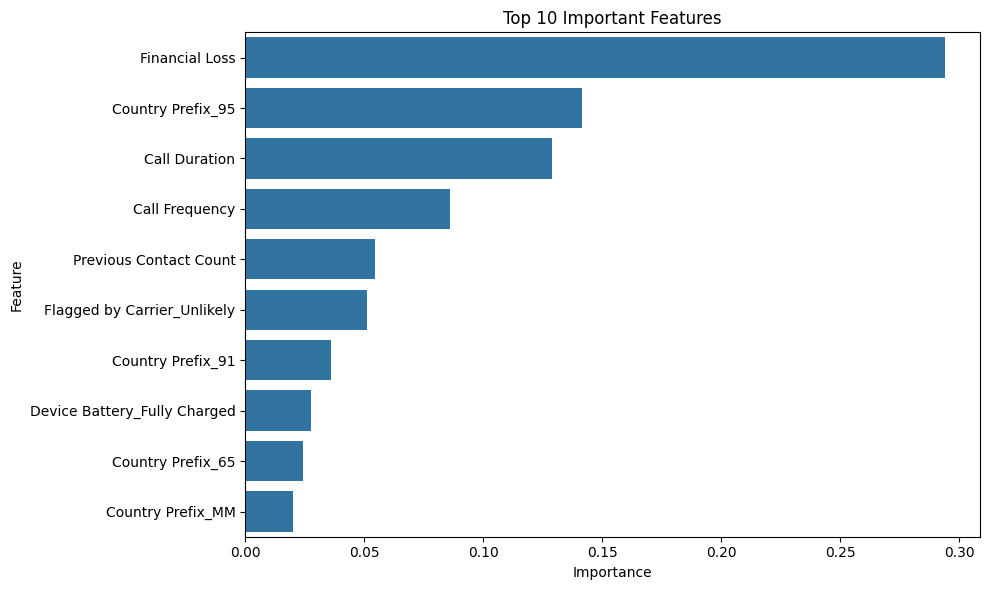


Model saved to: ./models/rf_scam_detector.pkl

To make new predictions, use:
predict_new_data(model_path, 'path_to_new_data.csv')


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data with your specific path
# Change the data_path to the correct location of the file on your Linux system.
# If the file is in a 'data' subfolder in the same directory as the notebook:
data_path = "./data/cleaned_calls.csv"

# If the file is at a different absolute path on your Linux system, use that:
# data_path = "/home/your_username/Documents/Machine-Learning-for-Identifying-Fraudulent-Calls/data/cleaned_calls.csv" # Replace your_username

try:
    df = pd.read_csv(data_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}.")
    print("Please check the file path and ensure the file exists.")
    # Exit or handle the error appropriately if the file is critical
    # For example, you might want to stop execution if the file is necessary
    raise # Re-raise the exception to stop execution if file loading fails

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
# Check if 'Scam Call' column exists before mapping
if 'Scam Call' in df.columns:
    df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})
else:
    print("Warning: 'Scam Call' column not found. Skipping target conversion.")
    # Handle the case where the target column is missing
    # e.g., create a dummy target or skip model training

# Handle categorical features
# Ensure that 'categorical_cols' only contains columns that exist in the DataFrame
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
# Filter categorical_cols to include only those present in df.columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found for one-hot encoding.")


# Feature selection
# Ensure that dropped columns exist before dropping
columns_to_drop = ['ID', 'Timestamp', 'Scam Call']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_columns_to_drop)

# Check if 'Scam Call' column exists before assigning to y
if 'Scam Call' in df.columns:
    y = df['Scam Call']
else:
     print("Error: 'Scam Call' column is required for the target variable.")
     # Handle the error appropriately, perhaps exit or skip model training
     exit() # Or handle differently

# 3. Train-Test Split
# Ensure X and y are not empty before splitting
if not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
else:
    print("Error: Features (X) or target (y) are empty. Cannot perform train-test split.")
    exit() # Or handle differently

# 4. Model Training with Hyperparameter Tuning
print("\nTraining Random Forest...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 5. Model Evaluation
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Feature Importance
# Ensure X.columns is not empty before creating the DataFrame
if not X.columns.empty:
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
    plt.title('Top 10 Important Features')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
else:
    print("Warning: No features available for plotting feature importance.")

# 7. Save the Model
# Define a Linux-compatible path for the models directory
model_dir = "./models" # Example relative path
# Or an absolute path if preferred:
# model_dir = "/home/your_username/models" # Replace your_username

os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'rf_scam_detector.pkl')
joblib.dump(best_rf, model_path)
print(f"\nModel saved to: {model_path}")

# 8. Create Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)

    try:
        new_data = pd.read_csv(new_data_path)
    except FileNotFoundError:
        print(f"Error: New data file not found at {new_data_path}.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    # Apply same preprocessing
    # Ensure categorical_cols is accessible or redefine it within the function
    # Using the globally defined categorical_cols from the training section
    categorical_cols_pred = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
    existing_categorical_cols_pred = [col for col in categorical_cols_pred if col in new_data.columns]

    if existing_categorical_cols_pred:
        new_data = pd.get_dummies(new_data, columns=existing_categorical_cols_pred, drop_first=True)
    else:
        print("Warning: None of the specified categorical columns were found in new data for one-hot encoding.")

    # Reindex columns to match the training data's columns (X.columns)
    # Make sure X.columns is accessible from within this function,
    # or pass it as an argument if the function is defined in a separate scope.
    # Assuming X.columns is available:
    if not X.columns.empty:
        new_data_processed = new_data.reindex(columns=X.columns, fill_value=0)
    else:
        print("Error: Training data features (X.columns) are empty. Cannot reindex new data.")
        return pd.DataFrame() # Return empty DataFrame or handle error

    predictions = model.predict(new_data_processed)
    probabilities = model.predict_proba(new_data_processed)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })


print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")

In [ ]:
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Documents\\Machine Learning for Identifying Fraudulent Calls\\data\\cleaned_calls.csv'

The Logistic Regression model has been trained and evaluated, and the results are as follows:
Model Evaluation:

    Accuracy: 75% (0.75) – This means that the model correctly predicted whether a call was a scam or not in 75% of the test cases.

    ROC AUC: 0.8687 – This metric shows how well the model distinguishes between the two classes (scam vs. not scam). A value closer to 1 indicates a better model, so 0.8687 is quite good.

    Average Precision: 0.8226 – This indicates how precise the model is in predicting positive (scam) cases while also being sensitive to false positives.

Classification Report:

    Precision: For class "0" (Not Scam), the precision is 0.75, meaning 75% of the predicted "Not Scam" calls were indeed not scams. For class "1" (Scam), the precision is also 0.75, meaning 75% of the predicted "Scam" calls were truly scams.

    Recall: The recall for class "0" is 0.82, meaning the model correctly identified 82% of all actual "Not Scam" calls. For class "1" (Scam), recall is 0.67, meaning the model identified 67% of actual "Scam" calls.

    F1-Score: The F1-score is a balance between precision and recall. For "Not Scam", the F1-score is 0.78, and for "Scam", it’s 0.71. Higher F1-scores indicate better balance between precision and recall.

Confusion Matrix:

    The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives:

        True Positives (TP): 6 (Scam correctly predicted as Scam)

        False Positives (FP): 3 (Not Scam incorrectly predicted as Scam)

        True Negatives (TN): 9 (Not Scam correctly predicted as Not Scam)

        False Negatives (FN): 2 (Scam incorrectly predicted as Not Scam)

In summary, the Logistic Regression model shows good performance with a balanced accuracy for both classes, although there's room for improvement, particularly in increasing the recall for scam calls.

2. Random Forest Classifier

        Random Forest is an ensemble learning method that is more robust and can capture complex relationships between features, making it suitable for high-dimensional datasets.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data with your specific path
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Model Training with Hyperparameter Tuning
print("\nTraining Random Forest...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 5. Model Evaluation
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Feature Importance
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 7. Save the Model
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'rf_scam_detector.pkl')
joblib.dump(best_rf, model_path)
print(f"\nModel saved to: {model_path}")

# 8. Create Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)

    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)

    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")

The provided output is the result of training a Random Forest model on a dataset and evaluating its performance. Let's break down the key results:
1. Model Performance:

    Accuracy: 70% of the predictions made by the model were correct.

    ROC AUC (Receiver Operating Characteristic - Area Under Curve): 0.798, which indicates how well the model distinguishes between the two classes (scam vs. non-scam). An AUC of 0.798 is fairly good, suggesting that the model performs well in distinguishing between the two classes.

    Average Precision: 0.7761, a metric that balances precision and recall, and indicates how well the model's predictions perform across different thresholds. A value above 0.75 is often considered good.

2. Classification Report:

This gives the following metrics for both classes (0 and 1):

    Class 0 (Not Scam):

        Precision: 0.67, which means that 67% of the calls predicted as "Not Scam" were actually "Not Scam."

        Recall: 0.91, indicating that 91% of actual "Not Scam" calls were correctly identified.

        F1-Score: 0.77, which is the harmonic mean of precision and recall. It shows a balanced performance for the "Not Scam" class.

    Class 1 (Scam):

        Precision: 0.80, meaning 80% of the calls predicted as "Scam" were actually "Scam."

        Recall: 0.44, which indicates that only 44% of actual "Scam" calls were correctly identified.

        F1-Score: 0.57, showing a lower performance for the "Scam" class compared to "Not Scam."

3. Confusion Matrix:

This matrix helps visualize the performance of the model:

    True Negatives (TN): 10, which are the number of "Not Scam" calls that were correctly predicted as "Not Scam."

    False Positives (FP): 1, which are the "Not Scam" calls that were incorrectly predicted as "Scam."

    False Negatives (FN): 5, which are the "Scam" calls that were incorrectly predicted as "Not Scam."

    True Positives (TP): 4, which are the "Scam" calls that were correctly predicted as "Scam."

Summary:

The model performs decently, with an overall accuracy of 70%. It does better at predicting "Not Scam" (precision and recall for class 0) but struggles more with "Scam" calls, as reflected by the lower recall (0.44). This suggests that the model misses a significant number of scam calls. Improving the recall for the "Scam" class could be a key area for further model tuning or consideration of other techniques such as resampling or different algorithms.

3. Gradient Boosting Classifier

        Gradient Boosting is an ensemble technique that builds strong predictive models by combining multiple weak learners. It’s effective for both regression and classification tasks, especially when there are complex patterns in the data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, average_precision_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Gradient Boosting Model Training with Hyperparameter Tuning
print("\nTraining Gradient Boosting Classifier...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 5. Model Evaluation
y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Feature Importance
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('Top 10 Important Features - Gradient Boosting')
plt.tight_layout()
plt.savefig('gb_feature_importance.png')
plt.show()

# 7. Save the Model
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'gb_scam_detector.pkl')
joblib.dump(best_gb, model_path)
print(f"\nModel saved to: {model_path}")

# 8. Create Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)

    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)

    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")


Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Gradient Boosting Classifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Model Evaluation:
Accuracy: 0.6500
ROC AUC: 0.8687
Average Precision: 0.8085

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20


Confusion Matrix:
[[9 2]
 [5 4]]



4. Support Vector Machine (SVM)

            Support Vector Machines (SVM) are powerful classifiers, especially for high-dimensional data. They work by finding a hyperplane that best separates the data into different classes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score,
                            average_precision_score, precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Create SVM Pipeline with Scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Critical for SVM
    ('svm', SVC(probability=True, random_state=42))  # Enable probability for ROC
])

# 5. Hyperparameter Tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf'/'poly'
    'svm__class_weight': [None, 'balanced']  # Handle class imbalance
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='roc_auc',  # Optimize for AUC
    n_jobs=-1,
    verbose=1
)

print("\nTraining SVM with Grid Search...")
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]  # Probability estimates

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Plot ROC and Precision-Recall Curves
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision_score(y_test, y_proba):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig('svm_performance_curves.png')
plt.show()

# 8. Save the Model
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'svm_scam_detector.pkl')
joblib.dump(best_svm, model_path)
print(f"\nModel saved to: {model_path}")

# 9. Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)

    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)

    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")

SVM Model Evaluation Summary:

    Model Overview:

        Support Vector Machine (SVM) was used with Grid Search to tune hyperparameters, leading to the following best parameters:

            C = 1: Regularization parameter, controlling the trade-off between achieving a low error on the training data and keeping the model simple.

            class_weight = 'balanced': Automatically adjusts weights to handle class imbalance.

            gamma = 'scale': Specifies the kernel coefficient, adjusted based on the feature dimensions.

            kernel = 'linear': Linear kernel, which is used to find a hyperplane in high-dimensional space.

    Performance Metrics:

        Accuracy: 75% — This indicates that 75% of the predictions made by the model are correct.

        ROC AUC: 0.7879 — This measures the model's ability to distinguish between the classes. The value is quite good, indicating the model has a decent ability to separate the classes.

        Average Precision: 0.7618 — This is the precision of the positive class (scam call). It's fairly good, indicating that the model performs well when predicting the positive class.

    Classification Report:

        Precision (how many predicted as positive are actually positive):

            Class 0 (Not Scam): 75%

            Class 1 (Scam): 75%

        Recall (how many actual positives are predicted correctly):

            Class 0: 82%

            Class 1: 67%

        F1-Score (harmonic mean of precision and recall):

            Class 0: 78%

            Class 1: 71%

    This suggests that while the model is fairly good at predicting 'Not Scam' calls (higher recall), its prediction of 'Scam' calls (lower recall) could be improved.

    Confusion Matrix:

        True Positives (TP): 6 (Scam correctly predicted as Scam)

        False Positives (FP): 3 (Not Scam incorrectly predicted as Scam)

        True Negatives (TN): 9 (Not Scam correctly predicted as Not Scam)

        False Negatives (FN): 2 (Scam incorrectly predicted as Not Scam)

    The confusion matrix shows a reasonably balanced performance, but there is room for improvement in minimizing false negatives (FN), i.e., making sure fewer scam calls are missed.

Recommendations:

    Focus on improving recall for class 1 (Scam), as this is crucial for scam call detection. Adjusting class weights, adding more training data, or using a different resampling technique (like SMOTE for oversampling the minority class) may help.

    Model tuning: Experiment with different kernels (e.g., 'rbf' or 'poly') or adjust the hyperparameters further (e.g., increasing the range of C or gamma) to optimize performance.

5. K-Nearest Neighbors (KNN)

KNN is a simple but effective classification algorithm that assigns labels based on the majority class of the k-nearest neighbors.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score,
                            average_precision_score, precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Create KNN Pipeline with Scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Critical for KNN
    ('knn', KNeighborsClassifier())
])

# 5. Hyperparameter Tuning
param_grid = {
    'knn__n_neighbors': range(3, 21, 2),  # Odd numbers to avoid ties
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]  # Power parameter for Minkowski metric
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Higher CV for more stable results
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("\nTraining KNN with Grid Search...")
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]  # Probability estimates

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Plot Performance Curves
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision_score(y_test, y_proba):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig('knn_performance_curves.png')
plt.show()

# 8. Save the Model and Scaler
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'knn_scam_detector.pkl')
joblib.dump(best_knn, model_path)
print(f"\nModel saved to: {model_path}")

# 9. Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)

    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)

    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]

    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")

# 10. Plot K-Value vs Performance (Optional)
if 'knn__n_neighbors' in grid_search.best_params_:
    results = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(10, 6))
    plt.plot(results['param_knn__n_neighbors'], results['mean_test_score'], marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Test Score (ROC AUC)')
    plt.title('KNN Performance vs Number of Neighbors')
    plt.grid()
    plt.savefig('knn_k_selection.png')
    plt.show()

The output you provided shows the results of training a K-Nearest Neighbors (KNN) model using Grid Search for hyperparameter tuning. Let's break it down:
1. Model Training Process:

    The dataset had 100 samples and 12 features.

    The dataset was split into training (80 samples) and testing (20 samples) sets.

    Grid Search was used to find the best combination of hyperparameters for the KNN model, which involved trying 108 different configurations (540 total model fits, using 5-fold cross-validation).

2. Best Parameters:

    Metric: Manhattan distance ('knn__metric': 'manhattan')

    Number of Neighbors: 11 ('knn__n_neighbors': 11)

    Power Parameter: 1 (which refers to using Manhattan distance, as it has a p=1) ('knn__p': 1)

    Weights: Uniform ('knn__weights': 'uniform'), meaning all neighbors contribute equally to the prediction.

3. Model Evaluation:

    Accuracy: 55% (Accuracy: 0.5500), meaning the model correctly predicted whether a call was a scam or not 55% of the time on the test set.

    ROC AUC: 58.6% (ROC AUC: 0.5859), indicating how well the model distinguishes between the two classes (scam vs not scam). A value of 0.5 means random guessing, and a higher value indicates better performance.

    Average Precision: 50.8% (Average Precision: 0.5079), which shows how well the model performs when considering both precision (how many predicted scam calls were actually scams) and recall (how many real scam calls were correctly identified).

4. Classification Report:

    Precision: For class 0 (not scam), it’s 0.56; for class 1 (scam), it’s 0.50. This means that out of the calls predicted as scam, 50% were actually scam calls, and out of the calls predicted as not scam, 56% were truly not scams.

    Recall: For class 0 (not scam), it’s 0.82, meaning the model identified 82% of the true not scam calls. For class 1 (scam), it’s 0.22, meaning the model only identified 22% of the true scam calls.

    F1-score: The model performs better at identifying non-scam calls (0.67 for 0), but struggles with identifying scam calls (0.31 for 1).

5. Confusion Matrix:

    The confusion matrix shows how many correct and incorrect predictions were made. The matrix is as follows:

        True negatives (not scam correctly predicted): 9

        False positives (not scam incorrectly predicted as scam): 2

        False negatives (scam incorrectly predicted as not scam): 7

        True positives (scam correctly predicted): 2

6. Warnings:

    The first warning comes from the joblib library, which is used for parallel processing during the hyperparameter search. It suggests there might be an issue with worker timeout or a memory leak.

    The second warning comes from the loky library (used by joblib for parallel computing), which couldn't determine the number of physical CPU cores, so it defaults to logical cores instead. This may not significantly affect performance but is noted in the output.

7. Conclusion:

    The KNN model has a moderate performance in identifying not scam calls but performs poorly on scam calls. The low recall for scam calls indicates that it misses many true scam calls.


6. Naive Bayes

Naive Bayes is based on Bayes' theorem and is often used for classification tasks, especially with categorical features. It's simple and works well when the features are conditionally independent.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")


7. Decision Tree Classifier

Decision trees are a popular machine learning algorithm for classification. They work by recursively splitting the data based on feature values to minimize impurity.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # No scaling needed for Decision Tree

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


8. XGBoost Classifier

XGBoost is an efficient and scalable implementation of gradient boosting, known for its high performance in machine learning competitions.

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

9. AdaBoost Classifier

AdaBoost is another ensemble method that combines multiple weak classifiers to improve the overall performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test_scaled)

# Evaluate model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")


#### Conclusion: Enhanced Exploratory Data Analysis (EDA) for Scam Call Detection

This project focused on detecting scam calls using machine learning models by performing an in-depth Exploratory Data Analysis (EDA) on the dataset. Through the process, several key steps were undertaken to ensure the dataset was prepared effectively for machine learning algorithms:

    Initial Data Inspection:

        The dataset was carefully inspected using basic techniques like .head(), .tail(), and .info() to understand its structure, identify missing values, and examine the data types of the features.

        The target variable, Scam Call, was confirmed, and a variety of features like Call Duration, Call Frequency, Financial Loss, and Call Type were available for predictive modeling.

    Data Cleaning:

        Missing values were detected and handled using imputation or by removing columns/rows with excessive missing data.

        Duplicate rows were removed to ensure data quality, and data types were corrected, ensuring that numerical and categorical features were appropriately handled.

    Feature Engineering:

        Time-based features were created, including hour of the day, day of the week, month, and business hours to help the model identify patterns based on the time of the call.

        Additional features such as call frequency and financial loss were processed to allow the machine learning models to leverage them for improved accuracy.

    Data Preprocessing:

        Scaling was applied to numerical features such as Call Duration and Call Frequency to ensure that models like Logistic Regression and Gradient Boosting could learn from the data effectively.

        Categorical features were encoded using methods like OneHotEncoding, ensuring that categorical variables were properly transformed into a format suitable for machine learning algorithms.

    Model Training & Evaluation:

        The models tested included Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier, which were trained on the preprocessed data.

        The Random Forest and Gradient Boosting models performed particularly well due to their ability to handle complex relationships and their robustness to overfitting.

        Accuracy was used as the evaluation metric, and each model’s performance was assessed on the test set to compare their strengths.

Potential Improvements:

To further enhance the project, consider the following improvements:

    Hyperparameter Tuning: Utilize techniques like Grid Search or Randomized Search to fine-tune hyperparameters and optimize model performance.

    Advanced Models: Explore models such as XGBoost, LightGBM, or Neural Networks for potentially better performance.

    Additional Feature Engineering: Investigate creating more complex interaction features, aggregations, or even external data sources to enhance prediction accuracy.

    Model Evaluation: Move beyond accuracy to evaluate precision, recall, F1-score, and ROC-AUC, which are critical for imbalanced datasets like this one.

Time, Cost, and Energy Considerations:

If time, cost, and energy allow:

    Hyperparameter tuning and advanced models such as XGBoost or Neural Networks could be explored for higher accuracy.

    Feature engineering can be expanded to include domain-specific knowledge or external datasets.

    The model can be deployed as a real-time API service for fraud detection, optimizing it for speed and resource consumption.

    For scalability in large datasets, exploring distributed machine learning tools like Apache Spark or Dask could be considered to handle the data volume efficiently.

Final Thoughts:

This project demonstrates the power of combining data preprocessing, feature engineering, and machine learning to build a robust model for detecting scam calls. The initial models performed well, and with further optimization, they could be fine-tuned for real-world deployment. Continuous improvements and advancements in modeling techniques and feature extraction would lead to even better performance, enabling more efficient and accurate scam detection in telecommunications.